### Desafío 2: Desafío Escolar

#### Enunciado

##### Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas para perfilar a los estudiantes. De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se pueden abstraer en categorías latentes.

#### Preliminares:

- Problema: cómo identificar alumnos con un bajo desempeño académico a través del promedio del año escolar

- Objetivos: Desarrollar un modelo que me permita obtener una función que me explique el promedio final.

- Criterio y métodos: 
1. Se procederá a importar las librerías necesarias para el desarrollo del problema
2. Se importará el archivo "students.csv" para hacer la limpieza y la correspondiente transformación de los datos necesarios para hacer el análisis
3. Una vez limpia y transformadas las variables de la base de datos se procederá a realizar tres modelos para G1, G2 y G3 respectivamente. Se realizará una regresión lineal a través de la econometría donde se analizará en términos generales el R2 (porcentaje de explicación del modelo, los p-value (rechazo/no rechazo de hipótesis nula de estimadores iguales a cero), AIC-BIC (comparación de modelos con mayor y menor cantidad de variables). El otro método se realizará a través de machine learning donde se analizará: 

#### Aspectos computacionales:

A continuación se importarán las librerías a utilizar para resolver el Desafío y que serán descriptas en este apartado el objetivo de las mismas.

- NumPy: extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices. 
- Pandas: biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- Matplotlib: es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy.
- Scipy.stats: paquete para el análisis de estadística y probabilidades.
- Seaborn: librería de visualización de datos en Python basada en matplotlib. La idea de Seaborn es que los científicos de datos dispongan de una interfaz para hacer gráficos estadísticos atractivos e explicativos: el objetivo es visualizar datos complejos de forma sencilla y extraer conclusiones.
- Statsmodels: librería de análisis estadístico y econométrico en Python. Proporciona las capacidades para operaciones estadísticas, financieras y econométricas.
- Sklearn: librería especializada en algoritmos para data mining y machine learning. Para este caso resuelve problemas de clasificación y regresión y análisis de métricas resultantes.
- Factor Analyzer: técnica de reducción de dimensionalidad dentro del análisis factorial
    
Lista de funciones utilizadas para este desafío y breve descripción de su objetivo:
- Valores_perdidos: para obtener la cantidad de NaN y el porcentaje
- Histograma: devuelve gráficos de histograma para las variables numéricas del df, con su respectiva media y mediana sobre el eje de las x.
- graf_barra: devuelve gráficos de barra para las variables del tipo objetc en el df.
- report_scores: devuelve las métricas del r2 y el error cuadrático medio.
- feth_features: devuelve correlaciones entre las variables y su respectivo valor absoluto.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import factor_analyzer as factor
import missingno as msngo
plt.style.use("seaborn")

#### Descripción:

In [2]:
#Importación del archivo con el que se hará el análisis. Se agrega el warning para evitar avisos de deprecación

import warnings
warnings.filterwarnings(action="ignore")

df=pd.read_csv("students.csv",encoding="ISO-8859-3", index_col=[0], sep="|")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [4]:
#reemplazo todos los valores nulos y los unifico

df= df.replace("sem validade", np.NaN)
df= df.replace("nulidade", np.NaN)
df= df.replace("zero", np.NaN)

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [6]:
#analizo datos perdidos

def valores_perdidos(df,var,print_list=False):
    
    """
    Argumentos de la función:
    df: La función debe ingresar un objeto DataFrame.
    var : Variable a inspeccionar.
    print_list : Opción para imprimir la lista de observaciones perdidas en la variable.
    
    La función retorna los datos perdidos de cada serie y su porcentaje
    """
    
    cant_perd=df[var].isnull().sum()
    print(var)
    print("La cantidad de valores perdidos es", cant_perd)
    print("El porcentaje de valores perdidos es:{}% ".format(round(cant_perd/len(df),4)*100))

In [7]:
for i in df.columns:
    valores_perdidos(df,i)
    print()

school
La cantidad de valores perdidos es 5
El porcentaje de valores perdidos es:1.27% 

sex
La cantidad de valores perdidos es 3
El porcentaje de valores perdidos es:0.76% 

age
La cantidad de valores perdidos es 4
El porcentaje de valores perdidos es:1.01% 

address
La cantidad de valores perdidos es 2
El porcentaje de valores perdidos es:0.51% 

famsize
La cantidad de valores perdidos es 4
El porcentaje de valores perdidos es:1.01% 

Pstatus
La cantidad de valores perdidos es 6
El porcentaje de valores perdidos es:1.52% 

Medu
La cantidad de valores perdidos es 3
El porcentaje de valores perdidos es:0.76% 

Fedu
La cantidad de valores perdidos es 5
El porcentaje de valores perdidos es:1.27% 

Mjob
La cantidad de valores perdidos es 6
El porcentaje de valores perdidos es:1.52% 

Fjob
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

reason
La cantidad de valores perdidos es 4
El porcentaje de valores perdidos es:1.01% 

guardian
La cantidad de valores p

In [8]:
df=df.dropna()

In [9]:
#elimino las comillas de las variables age, goout y health y las transformo a int

df["age"]=df["age"].apply(lambda x:x.replace('"',' ')).astype("int64")
df["goout"]=df["goout"].apply(lambda x:x.replace('"',' ')).astype("int64")
df["health"]=df["health"].apply(lambda x:x.replace('"',' ')).astype("int64")

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6


In [11]:
#recodifico las variables colocando 1 al sector minoritario

df["school"].value_counts("%")

GP    0.869718
MS    0.130282
Name: school, dtype: float64

In [12]:
df["school"]=np.where(df["school"]=="MS",1,0)

In [13]:
df["sex"].value_counts("%")

F    0.517606
M    0.482394
Name: sex, dtype: float64

In [14]:
df["sex"]=np.where(df["sex"]=="M",1,0)

In [15]:
df["address"].value_counts("%")

U    0.753521
R    0.246479
Name: address, dtype: float64

In [16]:
df["address"]=np.where(df["address"]=="R",1,0)

In [17]:
df["famsize"].value_counts("%")

GT3    0.735915
LE3    0.264085
Name: famsize, dtype: float64

In [18]:
df["famsize"]=np.where(df["famsize"]=="LE3",1,0)

In [19]:
df["Pstatus"].value_counts("%")

T    0.90493
A    0.09507
Name: Pstatus, dtype: float64

In [20]:
df["Pstatus"]=np.where(df["Pstatus"]=="A",1,0)

In [21]:
df["schoolsup"].value_counts("%")

no     0.866197
yes    0.133803
Name: schoolsup, dtype: float64

In [22]:
df["schoolsup"]=np.where(df["schoolsup"]=="yes",1,0)

In [23]:
df["paid"].value_counts("%")

no     0.556338
yes    0.443662
Name: paid, dtype: float64

In [24]:
df["paid"]=np.where(df["paid"]=="yes",1,0)

In [25]:
df["activities"].value_counts("%")

yes    0.521127
no     0.478873
Name: activities, dtype: float64

In [26]:
df["activities"]=np.where(df["activities"]=="no",1,0)

In [27]:
df["nursery"].value_counts("%")

yes    0.785211
no     0.214789
Name: nursery, dtype: float64

In [28]:
df["nursery"]=np.where(df["nursery"]=="no",1,0)

In [29]:
df["higher"].value_counts("%")

yes    0.947183
no     0.052817
Name: higher, dtype: float64

In [30]:
df["higher"]=np.where(df["higher"]=="no",1,0)

In [31]:
df["internet"].value_counts("%")

yes    0.81338
no     0.18662
Name: internet, dtype: float64

In [32]:
df["internet"]=np.where(df["internet"]=="no",1,0)

In [33]:
df["romantic"].value_counts("%")

no     0.665493
yes    0.334507
Name: romantic, dtype: float64

In [34]:
df["romantic"]=np.where(df["romantic"]=="yes",1,0)

In [35]:
df["famsup"].value_counts("%")

yes    0.612676
no     0.387324
Name: famsup, dtype: float64

In [36]:
df["famsup"]=np.where(df["famsup"]=="no",1,0)

In [37]:
#transformo las variables numéricas que el df estaba tomando como objetcs a int para poder hacer el análisis correctamente

df["traveltime"]=df["traveltime"].astype("int64")
df["studytime"]=df["studytime"].astype("int64")
df["failures"]=df["failures"].astype("int64")
df["famrel"]=df["famrel"].astype("int64")
df["freetime"]=df["freetime"].astype("int64")
df["Dalc"]=df["Dalc"].astype("int64")
df["Walc"]=df["Walc"].astype("int64")
df["absences"]=df["absences"].astype("int64")
df["Medu"]=df["Medu"].astype("int64")
df["Fedu"]=df["Fedu"].astype("int64")
df["G1"]=df["G1"].astype("int64")
df["G3"]=df["G3"].astype("int64")

In [38]:
#analizo mis variables

for i in df.columns:
    print (i)
    print (df[i].describe())
    print ()

school
count    284.000000
mean       0.130282
std        0.337207
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: school, dtype: float64

sex
count    284.000000
mean       0.482394
std        0.500572
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

age
count    284.000000
mean      16.707746
std        1.284238
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

address
count    284.000000
mean       0.246479
std        0.431721
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: address, dtype: float64

famsize
count    284.000000
mean       0.264085
std        0.441623
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: famsize, dtype: float64

Pstatus
count    284.00

In [39]:
#Para las variables numéricas voy a graficar histogramas con sus respectivas medias con la siguiente función

def histograma(df,var,mean=True,mediana=True):
    
    """
    Argumentos de la función:
    df: La función debe ingresar un objeto DataFrame.
    var : Variable a inspeccionar.
    mean : Opción para imprimir por defecto la media de la distribución en el eje de las x.
    mediana: Opción para imprimir por defecto la mediana de la distribución en el eje x.
    
    La función retorna histogramas para cada una de las variables en cuestión
    """
    
    _,_=plt.subplots(figsize=(15,7))
    print (plt.hist(df[var].dropna(),color="grey", alpha=.5))
    print (var)
    print (plt.ylabel("Frecuencias"))
    if mean==True:
        print (plt.axvline(df[var].dropna().mean(), lw=2.0, color="violet", linestyle="--"))
    if mediana==True:
        print (plt.axvline(df[var].dropna().median(), lw=2.0, color="blue", linestyle="--"))
    
    

(array([61., 74.,  0., 60.,  0., 70., 15.,  0.,  3.,  1.]), array([15. , 15.6, 16.2, 16.8, 17.4, 18. , 18.6, 19.2, 19.8, 20.4, 21. ]), <a list of 10 Patch objects>)
age
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


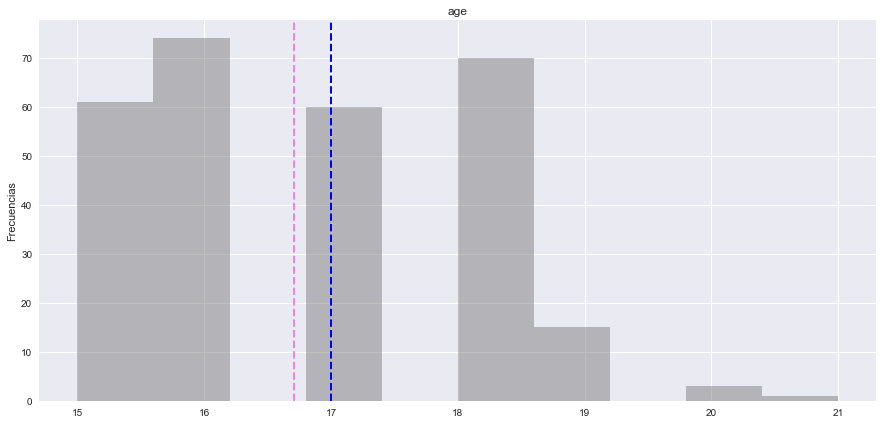


(array([ 1.,  0., 44.,  0.,  0., 71.,  0., 70.,  0., 98.]), array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]), <a list of 10 Patch objects>)
Medu
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


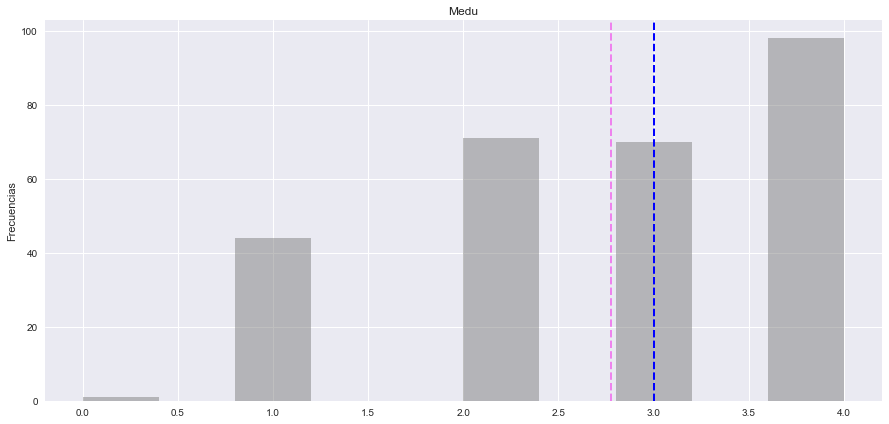


(array([ 1.,  0., 62.,  0.,  0., 77.,  0., 76.,  0., 68.]), array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]), <a list of 10 Patch objects>)
Fedu
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


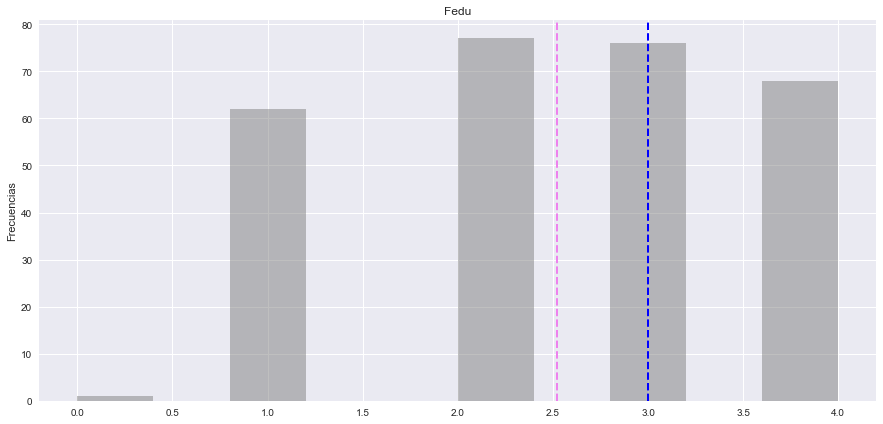


(array([177.,   0.,   0.,  84.,   0.,   0.,  18.,   0.,   0.,   5.]), array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]), <a list of 10 Patch objects>)
traveltime
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


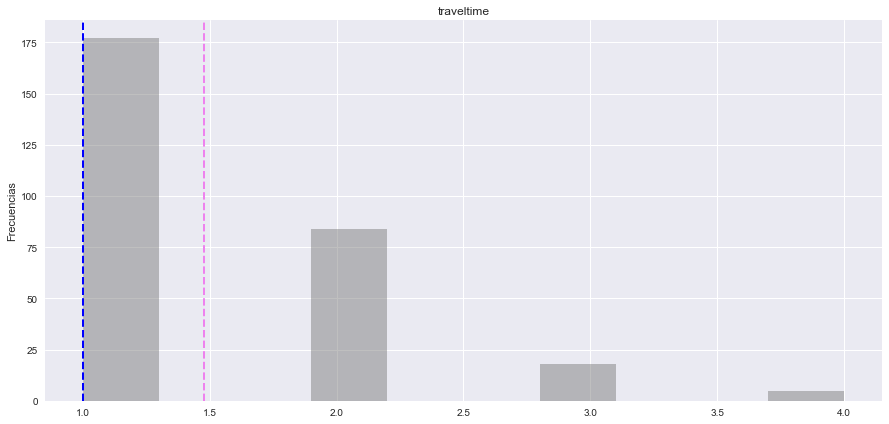


(array([ 75.,   0.,   0., 139.,   0.,   0.,  51.,   0.,   0.,  19.]), array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]), <a list of 10 Patch objects>)
studytime
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


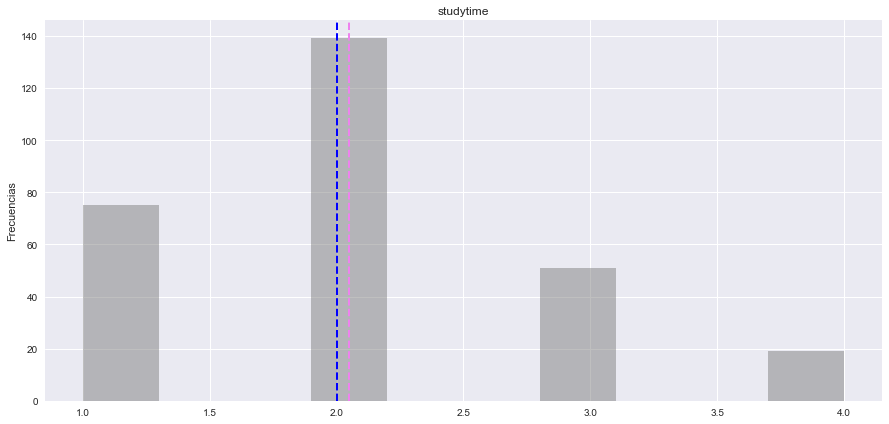


(array([223.,   0.,   0.,  37.,   0.,   0.,  14.,   0.,   0.,  10.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <a list of 10 Patch objects>)
failures
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


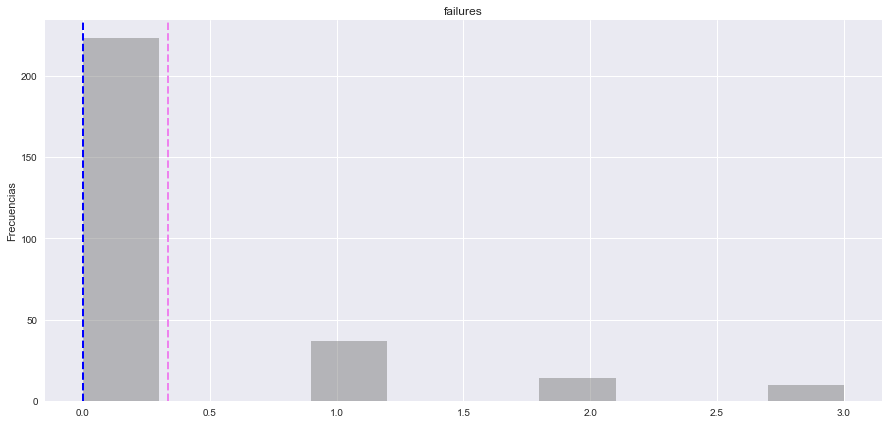


(array([  5.,   0.,  14.,   0.,   0.,  47.,   0., 145.,   0.,  73.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>)
famrel
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


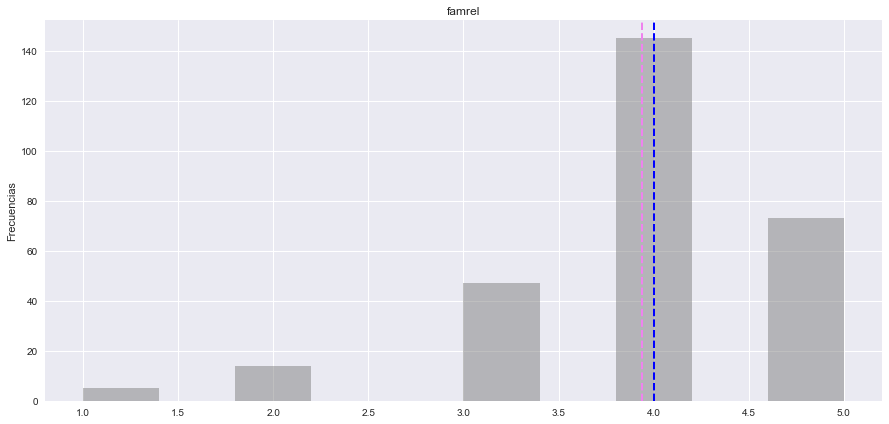


(array([ 16.,   0.,  49.,   0.,   0., 114.,   0.,  76.,   0.,  29.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>)
freetime
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


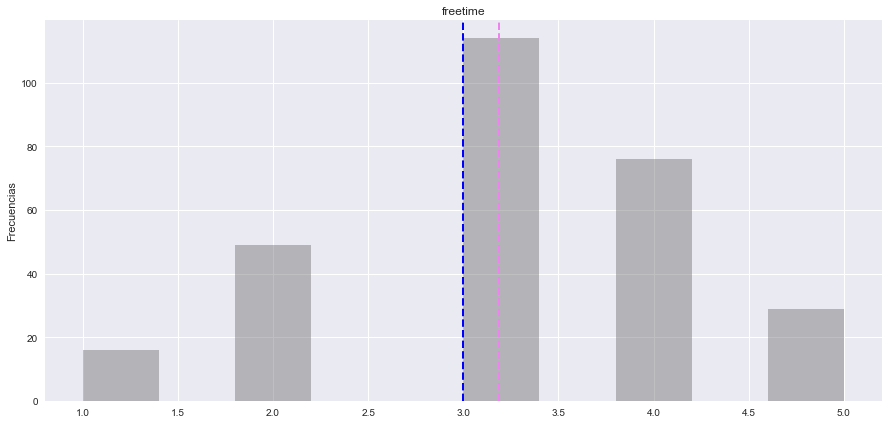


(array([198.,   0.,  53.,   0.,   0.,  20.,   0.,   8.,   0.,   5.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>)
Dalc
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


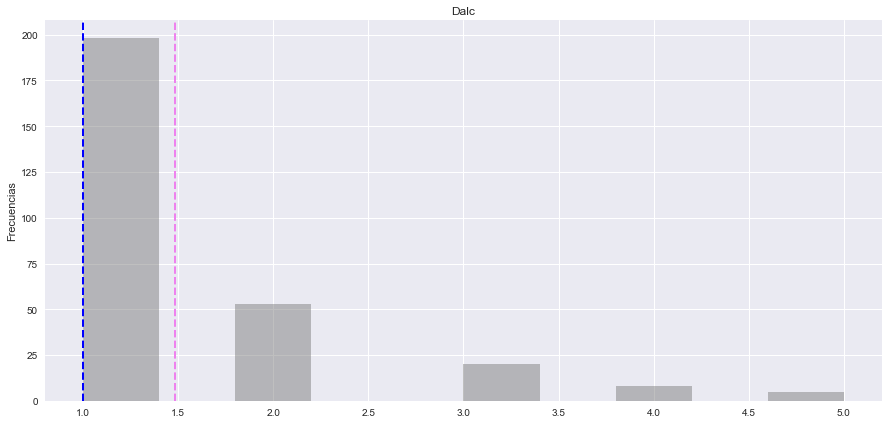


(array([116.,   0.,  58.,   0.,   0.,  54.,   0.,  38.,   0.,  18.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>)
Walc
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


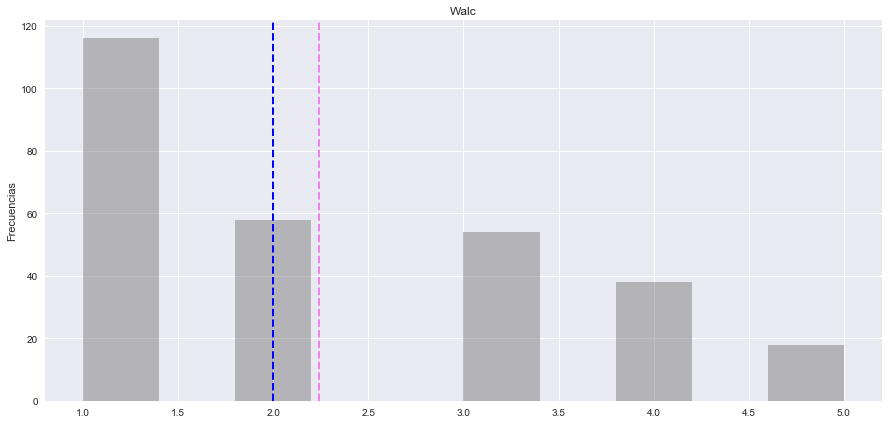


(array([214.,  44.,  17.,   4.,   1.,   2.,   0.,   1.,   0.,   1.]), array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]), <a list of 10 Patch objects>)
absences
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


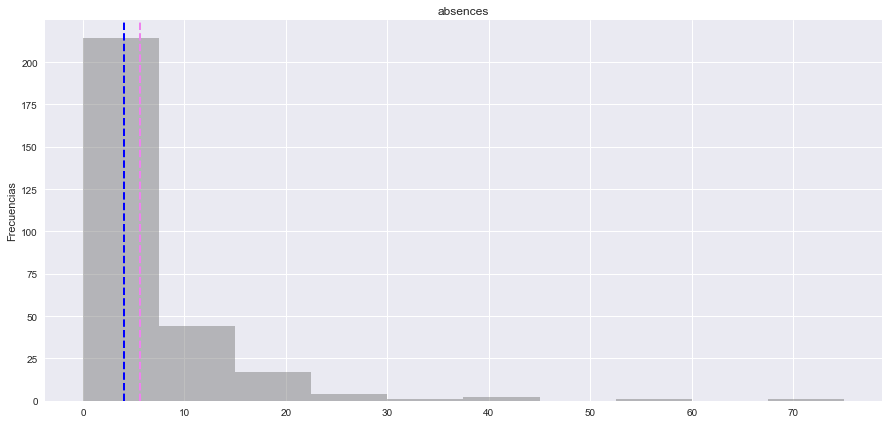


(array([ 6., 17., 56., 24., 60., 29., 46., 16., 23.,  7.]), array([ 4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. , 17.5, 19. ]), <a list of 10 Patch objects>)
G1
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


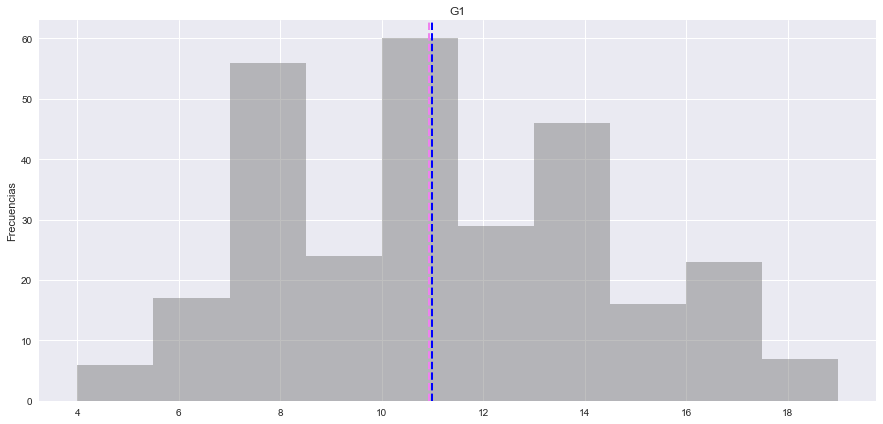


(array([10.,  0., 10., 28., 60., 57., 57., 36., 16., 10.]), array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]), <a list of 10 Patch objects>)
G2
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


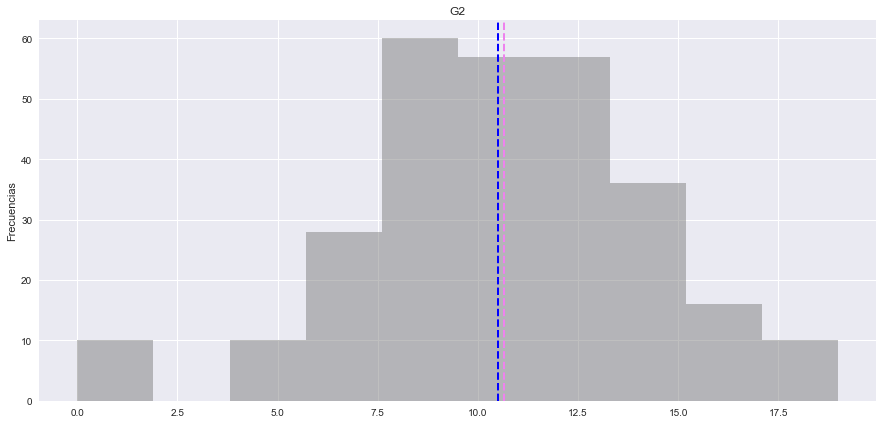


(array([26.,  0.,  6., 22., 42., 72., 46., 40., 17., 13.]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]), <a list of 10 Patch objects>)
G3
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


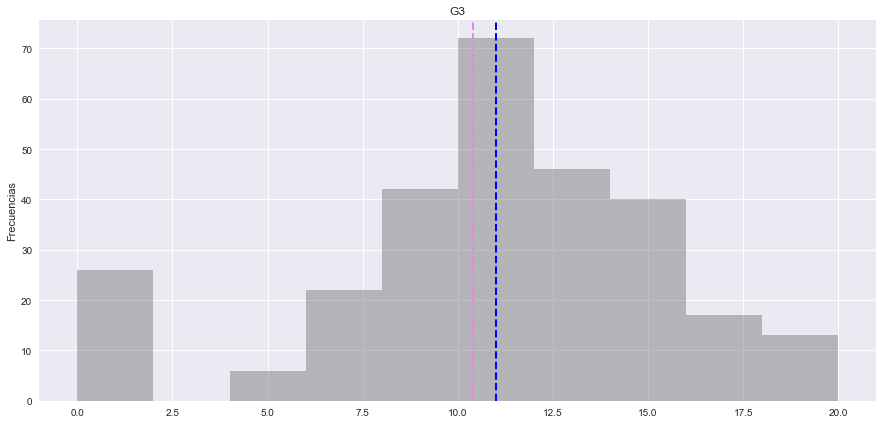


(array([ 14.,   0.,  76.,   0.,   0., 101.,   0.,  58.,   0.,  35.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>)
goout
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


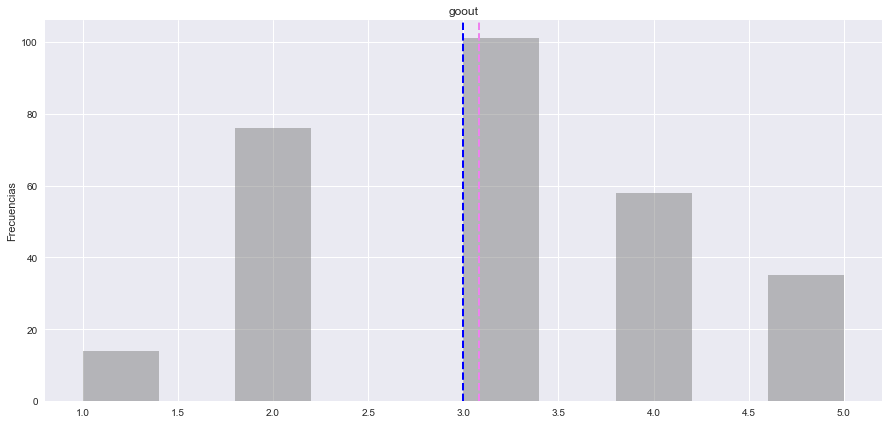


(array([ 27.,   0.,  28.,   0.,   0.,  73.,   0.,  52.,   0., 104.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>)
health
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


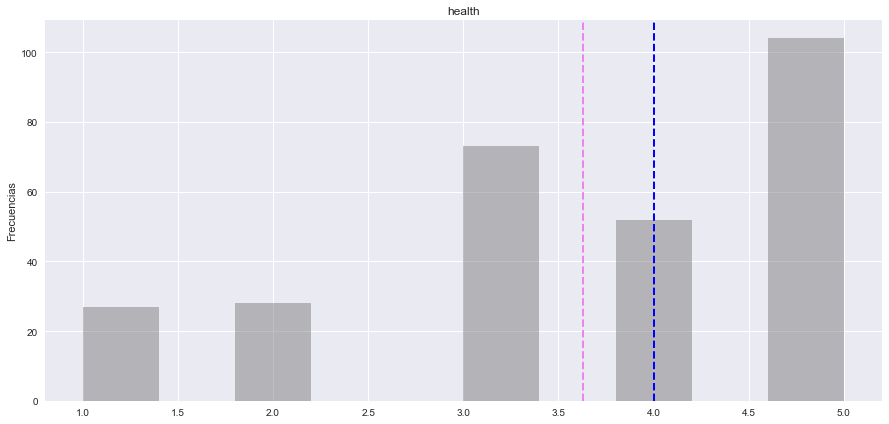

In [40]:
numericas=["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","Dalc","Walc","absences","G1","G2","G3","goout","health"]

for i in numericas:
    histograma(df,i)
    plt.title(i)
    plt.show()
    print()

Para las variables: studytime, failures, famrel, freetime, Dalc, Walc, absences, G2, goout tenemos

* ##### distribución asimétrica con cola derecha (mayor concentración de datos en los valores más pequeños)

Para las variables: G1, G3, health, tenemos

* ##### distribución asimétrica con cola izquierda (mayor concentración de datos en los valores más altos)

In [41]:
#Gráficos de barras para las variables cualitativas

def graf_barra(df):
    
    """
    Argumentos de la función:
    df: La función debe ingresar un objeto DataFrame.
    var : Variable a inspeccionar.
    
    La función retorna gráficos de barra para cada una de las variables en cuestión
    """
    
    for i in df.columns:
        if(df[i].dtype=="object"):
            sns.countplot(x=i,data=df)
            plt.title(i)
            plt.show()

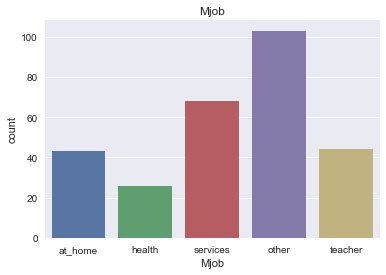

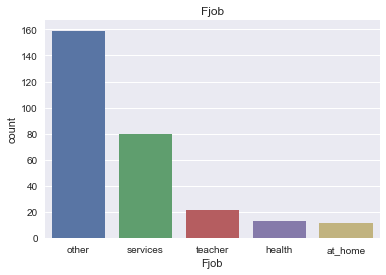

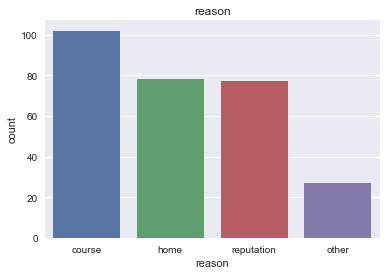

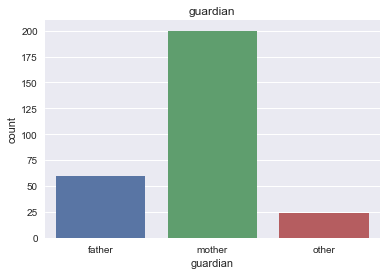

In [42]:
graf_barra(df)

In [43]:
#Binarizo las variables categóricas y creo nuevas columnas

categoricas=["Mjob","Fjob","reason","guardian"]

for i in categoricas:
    for j in df[i].unique():
        label=str(i)+"_"+str(j)
        df[label]=np.where(df[i]==j,1,0)

In [44]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Fjob_teacher,Fjob_health,Fjob_at_home,reason_course,reason_home,reason_reputation,reason_other,guardian_father,guardian_mother,guardian_other
1,0,0,17,0,0,0,1,1,at_home,other,...,0,0,0,1,0,0,0,1,0,0
3,0,0,15,0,0,0,4,2,health,services,...,0,0,0,0,1,0,0,0,1,0
5,0,1,16,0,1,0,4,3,services,other,...,0,0,0,0,0,1,0,0,1,0
6,0,1,16,0,1,0,2,2,other,other,...,0,0,0,0,1,0,0,0,1,0
7,0,0,17,0,0,1,4,4,other,teacher,...,1,0,0,0,1,0,0,0,1,0


In [45]:
#elimino las columnas que ya binarice 

df = df.drop(["Mjob", "Fjob", "reason", "guardian"], axis=1)

In [46]:
pd.set_option('display.max_columns', 50)

In [47]:
#verifico que esté todo ok

for i in df.columns:
    print (i)
    print (df[i].describe())
    print ()

school
count    284.000000
mean       0.130282
std        0.337207
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: school, dtype: float64

sex
count    284.000000
mean       0.482394
std        0.500572
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

age
count    284.000000
mean      16.707746
std        1.284238
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

address
count    284.000000
mean       0.246479
std        0.431721
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: address, dtype: float64

famsize
count    284.000000
mean       0.264085
std        0.441623
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: famsize, dtype: float64

Pstatus
count    284.00

In [48]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_services,Mjob_other,Mjob_teacher,Fjob_other,Fjob_services,Fjob_teacher,Fjob_health,Fjob_at_home,reason_course,reason_home,reason_reputation,reason_other,guardian_father,guardian_mother,guardian_other
1,0,0,17,0,0,0,1,1,1,2,0,0,0,0,1,1,0,0,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,0,0,15,0,0,0,4,2,1,3,0,0,0,1,0,0,0,0,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
5,0,1,16,0,1,0,4,3,1,2,0,0,0,1,0,0,0,0,0,5,4,2,1,2,5,10,15,15,15,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
6,0,1,16,0,1,0,2,2,1,2,0,0,1,0,1,0,0,0,0,4,4,4,1,1,3,0,12,12,11,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
7,0,0,17,0,0,1,4,4,2,2,0,1,0,0,1,0,0,1,0,4,1,4,1,1,1,6,6,5,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [49]:
#A partir de allí analizo una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health )
#para ver ver si éstas se pueden abstraer en categorías latentes.

df_aux=df.loc[:,"famrel":"health"]

In [50]:
df_aux.head()

,famrel,freetime,goout,Dalc,Walc,health
1,5,3,3,1,1,3
3,3,2,2,1,1,5
5,5,4,2,1,2,5
6,4,4,4,1,1,3
7,4,1,4,1,1,1


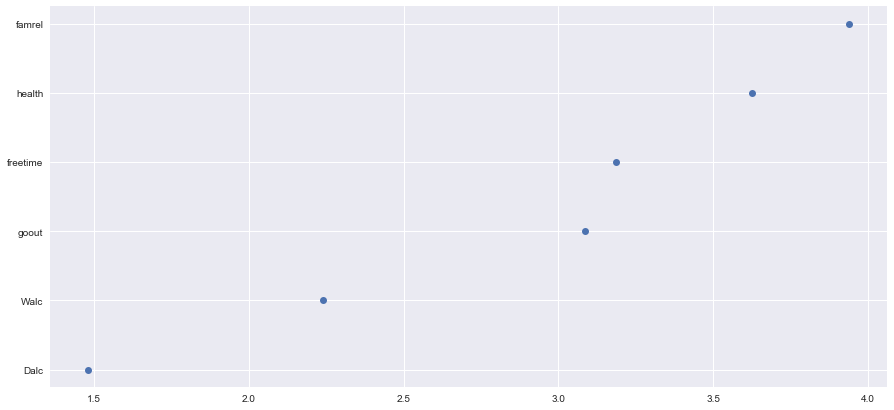

In [51]:
variable=[]
mean=[]

for colname, serie in df_aux.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    
df_1 = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
    
_,_=plt.subplots(figsize=(15,7))
plt.plot(df_1["mean"],df_1["var"], "o")

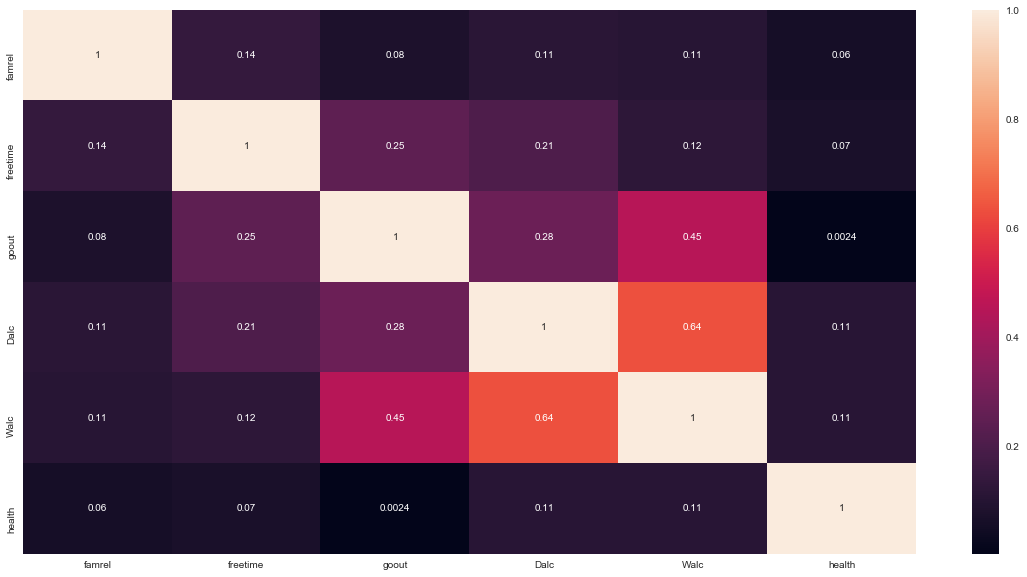

In [52]:
_,_=plt.subplots(figsize=(20,10))
sns.heatmap(df_aux.corr().apply(lambda x: abs(x)), annot=True)

In [53]:
factor.calculate_bartlett_sphericity(df_aux)

(258.5684035558002, 1.010339288896483e-46)

La prueba concluye que la matriz sigue una distribución multivariada normal y no sigue una matriz de identidad, por lo que se puede proceder con el análisis de factores

In [54]:
factor.calculate_kmo(df_aux)[1]

0.5784452766434522

In [55]:
factor.calculate_kmo(df_aux)[0][:25].sort_values("KMO")

,KMO
famrel,0.503497
Walc,0.557151
freetime,0.578644
Dalc,0.588351
health,0.594361
goout,0.618506


Como los valores obtenidos son menores a .70 se sugiere no proceder en el análisis factorial, sin embargo a fines de mostrar como continúa el proceso se continúa el análisis

In [56]:
#objeto con FactorAnalyzer() donde se estiman las dimensiones latentes y no se aplica rotación

#hay que tirarlo con n-1 variables, es decir 5

factor_trust_results=factor.FactorAnalyzer()
factor_trust_results.analyze(data=df_aux, n_factors=5)

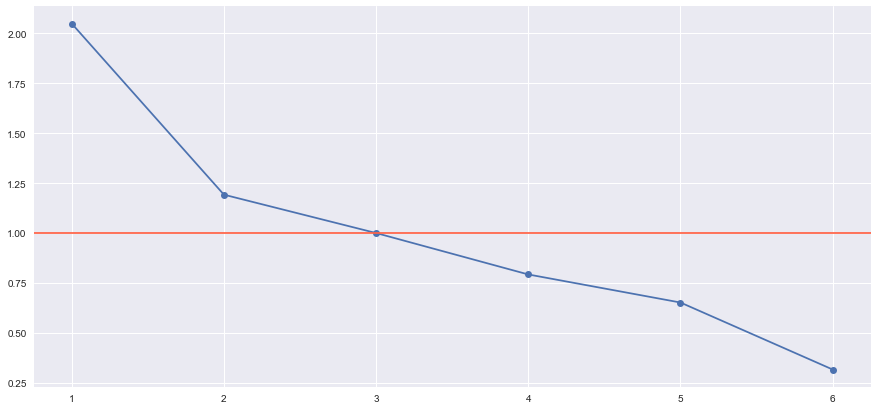

In [57]:
_,_=plt.subplots(figsize=(15,7))
fact_scree=factor_trust_results.get_eigenvalues()[0]
plt.plot(fact_scree.index+1, fact_scree.values, "o-")
plt.axhline(1,color="tomato")

Según el gráfico vamos a trabajar con dos factores (son dos los que están por encima de 1), por lo que realizamos el análisis nuevamente.
Esto significa que nos quedamos con los factores que explican una parte de la varianza mayor a una variable

In [58]:
factor_trust_results.analyze(data=df_aux, n_factors=2)

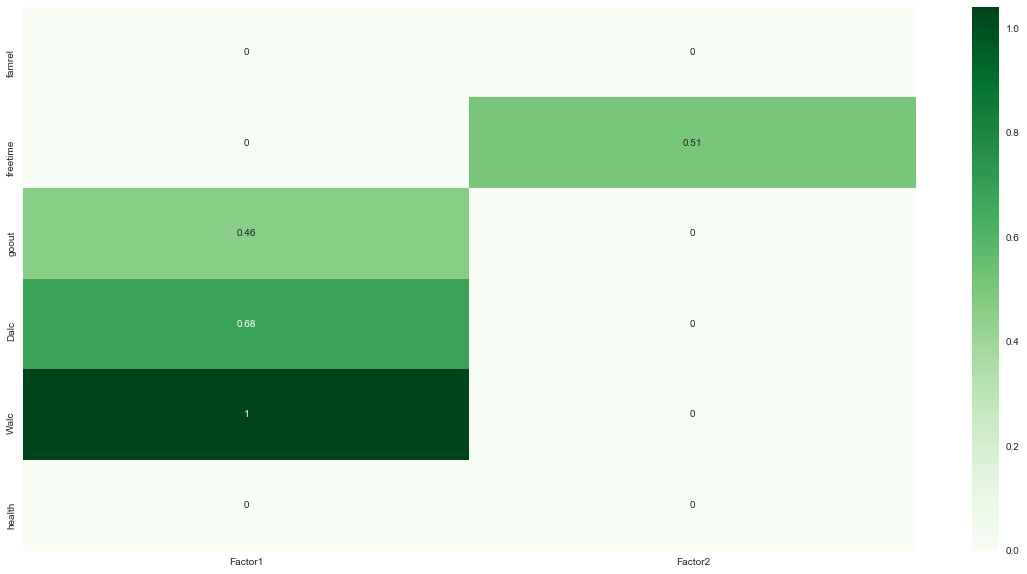

In [59]:
#Extraigo las cargas del modelo e identifico qué items están asociados a cada factor.

factor_loadings=factor_trust_results.loadings
factor_loadings=factor_loadings.applymap(lambda x:np.where(x<.4,0,round(x,2)))
_,_=plt.subplots(figsize=(20,10))
sns.heatmap(factor_loadings, cmap="Greens", annot=True)

In [60]:
#Extraigo los puntajes estimados

extract_factor_scores = factor_trust_results.get_scores(df_aux)

In [61]:
#Incorporo los factores a mi df

df=df.reset_index(drop=True)

In [62]:
for i in extract_factor_scores:
    df[i]=extract_factor_scores[i]

In [63]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_services,Mjob_other,Mjob_teacher,Fjob_other,Fjob_services,Fjob_teacher,Fjob_health,Fjob_at_home,reason_course,reason_home,reason_reputation,reason_other,guardian_father,guardian_mother,guardian_other,Factor1,Factor2
0,0,0,17,0,0,0,1,1,1,2,0,0,0,0,1,1,0,0,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,-0.855562,0.319583
1,0,0,15,0,0,0,4,2,1,3,0,0,0,1,0,0,0,0,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,-1.188231,-0.776346
2,0,1,16,0,1,0,4,3,1,2,0,0,0,1,0,0,0,0,0,5,4,2,1,2,5,10,15,15,15,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,-0.008126,0.414715
3,0,1,16,0,1,0,2,2,1,2,0,0,1,0,1,0,0,0,0,4,4,4,1,1,3,0,12,12,11,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.665692,0.803876
4,0,0,17,0,0,1,4,4,2,2,0,1,0,0,1,0,0,1,0,4,1,4,1,1,1,6,6,5,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,-1.268272,-0.687720


Si fuera el caso de que puedo utilizar los factores para reemplazar la batería de preguntas, dejo mi df de este modo para realizar el modelo predictivo con los factores. Sin embargo, debido a que los KMO dieron todos menores a 0.70 no voy a proceder a utilizar los Factores para hacer las regresiones lineales, si no que utilizaré las variables originales.

#### Modelación descriptiva:

In [64]:
#En la parte de modelación descriptiva, se deben generar modelos saturados por cada una de las notas en G1 , G2 y G3 .

#Comienzo armando el modelo para G1 con todas las variables del df

model_total_G1=smf.ols("G1 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other",df).fit()


In [65]:
resultados= model_total_G1.summary()
resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.090
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.75e-08
Time:                        22:07:04   Log-Likelihood:                -683.63
No. Observations:                 284   AIC:                             1447.
Df Residuals:                     244   BIC:                             1593.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7980      1.752      2.739      0.007       1.348       8.248
school               -0.3886      0.666     -0.583      0.560      -1.701       0.924
sex                   0.7631      0.432      1.768      0.078      -0.087       1.613
age                   0.0772      0.185      0.418      0.677      -0.287       0.441
address              -0.0205      0.487     -0.042      0.966      -0.980       0.939
famsize               0.3125      0.440      0.710      0.478      -0.555       1.180
Pstatus               0.1872      0.650      0.288      0.774      -1.094       1.468
Medu                  0.1809      0.282      0.642      0.521      -0.374       0.736
Fedu                  0.1527      0.236      0.646      0.519      -0.313       0.618
traveltime           -0.0215      0.291     -0.074      0.941      -0.594       0.551
studytime             0.5074      0.245      2.068      0.040       0.024       0.991
failures             -1.1235      0.282     -3.977      0.000      -1.680      -0.567
schoolsup            -1.7737      0.564     -3.145      0.002      -2.885      -0.663
famsup                1.0062      0.411      2.447      0.015       0.196       1.816
paid                  0.0321      0.403      0.080      0.937      -0.762       0.826
activities            0.4719      0.370      1.276      0.203      -0.257       1.201
nursery               0.0255      0.455      0.056      0.955      -0.871       0.922
higher               -1.1077      0.876     -1.265      0.207      -2.833       0.617
internet             -0.0671      0.502     -0.134      0.894      -1.055       0.921
romantic             -0.0842      0.399     -0.211      0.833      -0.870       0.702
famrel                0.1449      0.213      0.681      0.497      -0.274       0.564
freetime              0.3778      0.193      1.959      0.051      -0.002       0.758
goout                -0.7691      0.199     -3.873      0.000      -1.160      -0.378
Dalc                 -0.0730      0.286     -0.255      0.799      -0.636       0.490
Walc                  0.1585      0.210      0.756      0.451      -0.255       0.572
health               -0.2918      0.142     -2.062      0.040      -0.571      -0.013
absences             -0.0048      0.024     -0.196      0.845      -0.053       0.043
Mjob_at_home          1.0018      0.589      1.700      0.090      -0.159       2.163
Mjob_health           2.0269      0.652      3.108      0.002       0.742       3.312
Mjob_services         1.3931      0.499      2.794      0.006       0.411       2.375
Mjob_other            0.4595      0.498      0.922      0.358      -0.522       1.441
Mjob_teacher         -0.0832      0.637     -0.131      0.896      -1.338       1.172
Fjob_other           -0.0030      0.520     -0.006      0.995      -1.027

El modelo sirve (p<0.05) y explica un 33%. Con el modelo saturado observamos qué variables debemos ir sacando ya que no son significantes para el modelo.
* Aclaración importante: las variables deben sacarse de a una e ir observando los cambios. Para este caso puntual (y debido a que G1 no es mi vector objetivo final, sacaré de a varias a la vez con el objetivo de dejar un modelo limpio.

In [66]:
#Procedo a eliminar todas aquellas variables cuyo p-value > 0.05

model_total_G1=smf.ols("G1 ~ studytime + failures + schoolsup + famsup + goout  + health + Mjob_health + Mjob_services  + Fjob_teacher + reason_home + reason_reputation + guardian_father + guardian_mother",df).fit()

In [67]:
resultados= model_total_G1.summary()
resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     7.885
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.57e-13
Time:                        22:07:04   Log-Likelihood:                -694.92
No. Observations:                 284   AIC:                             1418.
Df Residuals:                     270   BIC:                             1469.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.7077      1.094     11.613      0.000      10.553      14.862
studytime             0.3537      0.215      1.648      0.100      -0.069       0.776
failures             -1.2848      0.254     -5.054      0.000      -1.785      -0.784
schoolsup            -1.9968      0.509     -3.924      0.000      -2.999      -0.995
famsup                0.9577      0.365      2.622      0.009       0.239       1.677
goout                -0.5663      0.164     -3.463      0.001      -0.888      -0.244
health               -0.2575      0.133     -1.934      0.054      -0.520       0.005
Mjob_health           1.7491      0.614      2.851      0.005       0.541       2.957
Mjob_services         1.1652      0.415      2.809      0.005       0.348       1.982
Fjob_teacher          2.0310      0.664      3.057      0.002       0.723       3.339
reason_home           0.2123      0.415      0.512      0.609      -0.604       1.028
reason_reputation     0.4151      0.434      0.957      0.339      -0.439       1.269
guardian_father      -0.2707      0.730     -0.371      0.711      -1.709       1.167
guardian_mother      -0.2775      0.661     -0.420      0.675      -1.578       1.023
==============================================================================
Omnibus:                        9.764   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                5.251
Skew:                           0.110   Prob(JB):                       0.0724
Kurtosis:                       2.371   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo disminuyó su porcentaje de explicación a un 27.5%, sigue siendo significativo. Disminuyeron los valores de AIC y BIC. Continuamos teniendo variables que no son significativas y que hay que continuar sacando del modelo

In [68]:
model_total_G1=smf.ols("G1 ~ failures + schoolsup + famsup + goout + Mjob_health + Mjob_services  + Fjob_teacher",df).fit()

In [69]:
resultados= model_total_G1.summary()
resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     13.01
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.84e-14
Time:                        22:07:05   Log-Likelihood:                -700.13
No. Observations:                 284   AIC:                             1416.
Df Residuals:                     276   BIC:                             1445.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.6049      0.564     22.347      0.000      11.495      13.715
failures         -1.3612      0.239     -5.687      0.000      -1.832      -0.890
schoolsup        -1.9554      0.511     -3.828      0.000      -2.961      -0.950
famsup            0.8308      0.360      2.308      0.022       0.122       1.539
goout            -0.5930      0.163     -3.634      0.000      -0.914      -0.272
Mjob_health       1.6929      0.611      2.773      0.006       0.491       2.895
Mjob_services     1.0784      0.414      2.608      0.010       0.264       1.892
Fjob_teacher      1.8839      0.663      2.843      0.005       0.580       3.188
==============================================================================
Omnibus:                        5.038   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.713
Skew:                           0.147   Prob(JB):                        0.156
Kurtosis:                       2.524   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo ahora explica un 24.8% (un porcentaje aún menor) pero nos quedamos sólo con las variables significativas para el modelo. Efectivamente el AIC y BIC disminuyeron aún más por trabajar con menos variables.

In [70]:
#procedo a armar la función de la regresión lineal 

df_G1=pd.DataFrame({"Colum":model_total_G1.params.index, "Coef":model_total_G1.params})
y="y= "
for i, row in df_G1.iterrows():
    if(row["Colum"]=="Intercept"):
        y=y+str(round(row["Coef"],4))
    else:
        if row["Coef"]>0:
            y=y+ " + " +str(round(row["Coef"],4))+ " * " + row["Colum"]
        else:
            y=y+str(round(row["Coef"],4))+ " * " + row["Colum"]
            
print ("El modelo para predecir G1 es:" + " " +y)
        

El modelo para predecir G1 es: y= 12.6049-1.3612 * failures-1.9554 * schoolsup + 0.8308 * famsup-0.593 * goout + 1.6929 * Mjob_health + 1.0784 * Mjob_services + 1.8839 * Fjob_teacher


In [71]:
#Hago lo mismo para G2

model_total_G2=smf.ols("G2 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1",df).fit()
resultados_G2= model_total_G2.summary()
resultados_G2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     21.23
Date:                Wed, 29 May 2019   Prob (F-statistic):           6.35e-59
Time:                        22:07:06   Log-Likelihood:                -567.39
No. Observations:                 284   AIC:                             1217.
Df Residuals:                     243   BIC:                             1366.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2500      1.183      1.901      0.058      -0.081       4.581
school                0.6174      0.444      1.391      0.165      -0.257       1.492
sex                   0.1467      0.289      0.507      0.612      -0.423       0.716
age                  -0.1446      0.123     -1.176      0.241      -0.387       0.098
address              -0.7340      0.324     -2.265      0.024      -1.372      -0.096
famsize               0.1601      0.293      0.546      0.586      -0.418       0.738
Pstatus               0.4132      0.433      0.954      0.341      -0.440       1.266
Medu                  0.1463      0.188      0.780      0.436      -0.223       0.516
Fedu                 -0.2716      0.157     -1.726      0.086      -0.582       0.038
traveltime           -0.2002      0.194     -1.035      0.302      -0.581       0.181
studytime            -0.0761      0.165     -0.462      0.644      -0.401       0.248
failures             -0.0372      0.194     -0.192      0.848      -0.419       0.345
schoolsup             0.6846      0.383      1.788      0.075      -0.069       1.439
famsup                0.0243      0.277      0.088      0.930      -0.521       0.570
paid                  0.4468      0.268      1.666      0.097      -0.081       0.975
activities           -0.2479      0.247     -1.003      0.317      -0.735       0.239
nursery              -0.1686      0.303     -0.557      0.578      -0.765       0.428
higher               -0.0326      0.585     -0.056      0.956      -1.184       1.119
internet             -0.3763      0.334     -1.127      0.261      -1.034       0.281
romantic             -0.6505      0.266     -2.450      0.015      -1.174      -0.127
famrel               -0.1127      0.142     -0.794      0.428      -0.392       0.167
freetime             -0.0353      0.129     -0.273      0.785      -0.290       0.219
goout                -0.2179      0.136     -1.600      0.111      -0.486       0.050
Dalc                 -0.1390      0.190     -0.731      0.466      -0.514       0.236
Walc                  0.2052      0.140      1.468      0.143      -0.070       0.480
health               -0.1065      0.095     -1.121      0.264      -0.294       0.081
absences             -0.0032      0.016     -0.198      0.843      -0.035       0.029
Mjob_at_home          0.2437      0.394      0.618      0.537      -0.533       1.021
Mjob_health           0.5505      0.443      1.244      0.215      -0.321       1.422
Mjob_services         0.3908      0.337      1.159      0.247      -0.273       1.055
Mjob_other            0.7260      0.332      2.185      0.030       0.071       1.381
Mjob_teacher          0.3389      0.424      0.799      0.425      -0.496       1.174
Fjob_other            0.6789      0.346      1.963      0.051      -0.002

El modelo sirve (p<0.05) y explica un 77.8%. Con el modelo saturado observamos qué variables debemos ir sacando ya que no son significantes para el modelo.
* Aclaración importante: las variables deben sacarse de a una e ir observando los cambios. Para este caso puntual (y debido a que G2 no es mi vector objetivo final, sacaré de a varias a la vez con el objetivo de dejar un modelo limpio.

In [72]:
#elimino las variables con p-value>0.05

model_total_G2=smf.ols("G2 ~ failures + famsup + goout + health + Mjob_health + Mjob_services + Mjob_other + Fjob_services + Fjob_teacher + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other +G1",df).fit()
resultados_G2= model_total_G2.summary()
resultados_G2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     51.09
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.59e-69
Time:                        22:07:06   Log-Likelihood:                -589.04
No. Observations:                 284   AIC:                             1210.
Df Residuals:                     268   BIC:                             1268.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5450      0.591      0.922      0.357      -0.618       1.708
failures             -0.1647      0.184     -0.896      0.371      -0.527       0.197
famsup               -0.0941      0.252     -0.373      0.709      -0.591       0.403
goout                -0.1660      0.115     -1.443      0.150      -0.393       0.061
health               -0.1530      0.093     -1.650      0.100      -0.336       0.030
Mjob_health           0.6670      0.466      1.432      0.153      -0.250       1.584
Mjob_services         0.4170      0.335      1.244      0.215      -0.243       1.077
Mjob_other            0.4770      0.308      1.550      0.122      -0.129       1.083
Fjob_services         0.2444      0.283      0.865      0.388      -0.312       0.801
Fjob_teacher         -0.9573      0.480     -1.995      0.047      -1.902      -0.013
reason_home           0.3890      0.303      1.283      0.201      -0.208       0.986
reason_reputation     0.1047      0.314      0.333      0.739      -0.514       0.724
reason_other          0.7597      0.439      1.730      0.085      -0.105       1.624
guardian_father       0.4827      0.310      1.559      0.120      -0.127       1.093
guardian_mother       0.3376      0.253      1.336      0.183      -0.160       0.835
guardian_other       -0.2753      0.378     -0.728      0.467      -1.020       0.469
G1                    0.9511      0.041     23.276      0.000       0.871       1.032
==============================================================================
Omnibus:                      140.216   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              908.716
Skew:                          -1.918   Prob(JB):                    4.73e-198
Kurtosis:                      10.879   Cond. No.                     6.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

El modelo disminuyó su porcentaje de explicación a un 74.1%, sigue siendo significativo. Disminuyeron los valores de AIC y BIC. Continuamos teniendo variables que no son significativas y que hay que continuar sacando del modelo

In [73]:
#continuamos eliminando variables no significativas

model_total_G2=smf.ols("G2 ~ failures + famsup + goout + health + Mjob_health + Mjob_services + guardian_father + guardian_mother + guardian_other+G1",df).fit()
resultados_G2= model_total_G2.summary()
resultados_G2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     82.18
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.36e-72
Time:                        22:07:07   Log-Likelihood:                -595.06
No. Observations:                 284   AIC:                             1210.
Df Residuals:                     274   BIC:                             1247.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9989      0.560      1.783      0.076      -0.104       2.102
failures           -0.1778      0.184     -0.966      0.335      -0.540       0.185
famsup              0.0339      0.249      0.136      0.892      -0.457       0.525
goout              -0.1606      0.116     -1.387      0.167      -0.389       0.067
health             -0.1519      0.093     -1.639      0.102      -0.334       0.031
Mjob_health         0.5462      0.432      1.266      0.207      -0.303       1.396
Mjob_services       0.2074      0.292      0.710      0.478      -0.368       0.783
guardian_father     0.6778      0.294      2.308      0.022       0.100       1.256
guardian_mother     0.3887      0.252      1.540      0.125      -0.108       0.886
guardian_other     -0.0676      0.373     -0.181      0.856      -0.802       0.667
G1                  0.9351      0.041     23.080      0.000       0.855       1.015
==============================================================================
Omnibus:                      160.305   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.041
Skew:                          -2.173   Prob(JB):                    2.05e-285
Kurtosis:                      12.587   Cond. No.                     7.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

El modelo ahora explica un 73% (un porcentaje aún menor) pero nos quedamos sólo con las variables significativas para el modelo. Efectivamente el AIC y BIC disminuyeron aún más por trabajar con menos variables.

In [74]:
#procedo a armar la función de la regresión lineal 

df_G2=pd.DataFrame({"Colum":model_total_G2.params.index, "Coef":model_total_G2.params})
y="y= "
for i, row in df_G2.iterrows():
    if(row["Colum"]=="Intercept"):
        y=y+str(round(row["Coef"],4))
    else:
        if row["Coef"]>0:
            y=y+ " + " +str(round(row["Coef"],4))+ " * " + row["Colum"]
        else:
            y=y+str(round(row["Coef"],4))+ " * " + row["Colum"]
            
print ("El modelo para predecir G2 es:" + " " +y)

El modelo para predecir G2 es: y= 0.9989-0.1778 * failures + 0.0339 * famsup-0.1606 * goout-0.1519 * health + 0.5462 * Mjob_health + 0.2074 * Mjob_services + 0.6778 * guardian_father + 0.3887 * guardian_mother-0.0676 * guardian_other + 0.9351 * G1


#### Modelo predictivo:

In [75]:
#Armo el modelo para G3

#Método econométrico

model_total_G3=smf.ols("G3 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     34.13
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.20e-79
Time:                        22:07:07   Log-Likelihood:                -561.92
No. Observations:                 284   AIC:                             1208.
Df Residuals:                     242   BIC:                             1361.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8287      1.172     -0.707      0.480      -3.137       1.480
school                0.7901      0.438      1.804      0.072      -0.073       1.653
sex                   0.0428      0.284      0.151      0.880      -0.517       0.603
age                  -0.1150      0.121     -0.949      0.344      -0.354       0.124
address              -0.2036      0.322     -0.633      0.528      -0.838       0.430
famsize              -0.1268      0.288     -0.440      0.661      -0.695       0.441
Pstatus               0.4331      0.426      1.016      0.311      -0.407       1.273
Medu                  0.1718      0.185      0.931      0.353      -0.192       0.536
Fedu                 -0.2286      0.156     -1.469      0.143      -0.535       0.078
traveltime            0.0706      0.191      0.370      0.712      -0.305       0.446
studytime            -0.1092      0.162     -0.674      0.501      -0.428       0.210
failures             -0.2126      0.191     -1.115      0.266      -0.588       0.163
schoolsup             0.2645      0.379      0.698      0.486      -0.482       1.011
famsup               -0.1858      0.272     -0.682      0.496      -0.722       0.351
paid                  0.0888      0.265      0.335      0.738      -0.434       0.611
activities            0.3307      0.243      1.359      0.175      -0.149       0.810
nursery               0.0393      0.298      0.132      0.895      -0.547       0.626
higher               -0.4869      0.575     -0.847      0.398      -1.619       0.645
internet             -0.0045      0.329     -0.014      0.989      -0.653       0.643
romantic             -0.2096      0.264     -0.793      0.428      -0.730       0.311
famrel                0.4285      0.140      3.070      0.002       0.154       0.703
freetime              0.0901      0.127      0.709      0.479      -0.160       0.341
goout                -0.2009      0.135     -1.493      0.137      -0.466       0.064
Dalc                 -0.3441      0.187     -1.838      0.067      -0.713       0.025
Walc                  0.3981      0.138      2.885      0.004       0.126       0.670
health                0.0219      0.094      0.234      0.816      -0.163       0.206
absences              0.0417      0.016      2.613      0.010       0.010       0.073
Mjob_at_home         -0.2907      0.388     -0.749      0.455      -1.055       0.474
Mjob_health          -0.3296      0.436     -0.755      0.451      -1.189       0.530
Mjob_services        -0.1096      0.332     -0.330      0.742      -0.764       0.545
Mjob_other            0.1339      0.330      0.406      0.685      -0.516       0.784
Mjob_teacher         -0.2327      0.417     -0.558      0.578      -1.055       0.589
Fjob_other           -0.3597      0.343     -1.050      0.295      -1.035

In [76]:
#Saco sex

model_total_G3=smf.ols("G3 ~ age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     35.62
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.67e-80
Time:                        22:07:07   Log-Likelihood:                -563.82
No. Observations:                 284   AIC:                             1208.
Df Residuals:                     244   BIC:                             1354.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5430      1.104     -1.398      0.163      -3.717       0.631
age                  -0.0318      0.112     -0.284      0.777      -0.253       0.189
address              -0.0697      0.313     -0.223      0.824      -0.687       0.547
famsize              -0.0777      0.285     -0.272      0.786      -0.640       0.485
Pstatus               0.4468      0.427      1.046      0.297      -0.395       1.288
Medu                  0.2007      0.184      1.090      0.277      -0.162       0.563
Fedu                 -0.2137      0.156     -1.372      0.171      -0.521       0.093
traveltime            0.1410      0.187      0.754      0.451      -0.227       0.509
studytime            -0.1373      0.158     -0.871      0.384      -0.448       0.173
failures             -0.2221      0.191     -1.162      0.246      -0.598       0.154
schoolsup             0.2444      0.378      0.647      0.518      -0.500       0.989
famsup               -0.1219      0.269     -0.453      0.651      -0.652       0.408
paid                  0.1269      0.264      0.480      0.632      -0.394       0.647
activities            0.4035      0.240      1.679      0.094      -0.070       0.877
nursery               0.1085      0.295      0.368      0.714      -0.473       0.690
higher               -0.5565      0.569     -0.979      0.329      -1.677       0.564
internet              0.0442      0.328      0.135      0.893      -0.601       0.689
romantic             -0.1843      0.264     -0.697      0.486      -0.705       0.336
famrel                0.4006      0.139      2.887      0.004       0.127       0.674
freetime              0.1126      0.125      0.897      0.370      -0.135       0.360
goout                -0.2225      0.133     -1.667      0.097      -0.485       0.040
Dalc                 -0.3397      0.187     -1.812      0.071      -0.709       0.030
Walc                  0.4012      0.136      2.947      0.004       0.133       0.669
health                0.0214      0.093      0.230      0.818      -0.162       0.205
absences              0.0362      0.016      2.317      0.021       0.005       0.067
Mjob_at_home         -0.4254      0.382     -1.114      0.266      -1.177       0.327
Mjob_health          -0.4986      0.427     -1.168      0.244      -1.339       0.342
Mjob_services        -0.2297      0.326     -0.704      0.482      -0.872       0.413
Mjob_other            0.0203      0.322      0.063      0.950      -0.615       0.655
Mjob_teacher         -0.4096      0.405     -1.012      0.313      -1.207       0.388
Fjob_other           -0.5372      0.327     -1.645      0.101      -1.180       0.106
Fjob_services        -0.5752      0.334     -1.722      0.086      -1.233       0.083
Fjob_teacher         -0.4168      0.480     -0.868      0.386      -1.363

In [77]:
#Saco age

model_total_G3=smf.ols("G3 ~ address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     36.69
Date:                Wed, 29 May 2019   Prob (F-statistic):           9.65e-81
Time:                        22:07:08   Log-Likelihood:                -563.87
No. Observations:                 284   AIC:                             1206.
Df Residuals:                     245   BIC:                             1348.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8075      0.589     -3.067      0.002      -2.968      -0.647
address              -0.0776      0.312     -0.249      0.804      -0.691       0.536
famsize              -0.0799      0.285     -0.281      0.779      -0.641       0.481
Pstatus               0.4618      0.423      1.091      0.276      -0.372       1.295
Medu                  0.2058      0.183      1.125      0.262      -0.154       0.566
Fedu                 -0.2139      0.155     -1.376      0.170      -0.520       0.092
traveltime            0.1396      0.187      0.748      0.455      -0.228       0.507
studytime            -0.1417      0.156     -0.905      0.366      -0.450       0.167
failures             -0.2229      0.191     -1.169      0.243      -0.598       0.153
schoolsup             0.2704      0.366      0.739      0.460      -0.450       0.991
famsup               -0.1294      0.267     -0.484      0.629      -0.656       0.397
paid                  0.1221      0.263      0.464      0.643      -0.396       0.641
activities            0.4013      0.240      1.674      0.095      -0.071       0.873
nursery               0.1101      0.295      0.374      0.709      -0.470       0.690
higher               -0.5728      0.565     -1.014      0.312      -1.685       0.540
internet              0.0345      0.325      0.106      0.916      -0.606       0.675
romantic             -0.1908      0.263     -0.726      0.468      -0.708       0.327
famrel                0.4000      0.138      2.889      0.004       0.127       0.673
freetime              0.1150      0.125      0.920      0.358      -0.131       0.361
goout                -0.2280      0.132     -1.730      0.085      -0.488       0.032
Dalc                 -0.3441      0.186     -1.845      0.066      -0.711       0.023
Walc                  0.4010      0.136      2.951      0.003       0.133       0.669
health                0.0234      0.093      0.253      0.801      -0.159       0.206
absences              0.0356      0.015      2.305      0.022       0.005       0.066
Mjob_at_home         -0.4739      0.341     -1.391      0.165      -1.145       0.197
Mjob_health          -0.5486      0.388     -1.414      0.159      -1.313       0.215
Mjob_services        -0.2835      0.265     -1.069      0.286      -0.806       0.239
Mjob_other           -0.0326      0.262     -0.124      0.901      -0.550       0.484
Mjob_teacher         -0.4689      0.346     -1.355      0.177      -1.151       0.213
Fjob_other           -0.5898      0.268     -2.199      0.029      -1.118      -0.062
Fjob_services        -0.6257      0.282     -2.218      0.027      -1.181      -0.070
Fjob_teacher         -0.4682      0.444     -1.055      0.293      -1.343       0.406
Fjob_health          -0.1911      0.519     -0.368      0.713      -1.214

In [78]:
#Saco adress

model_total_G3=smf.ols("G3 ~ famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     37.82
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.60e-81
Time:                        22:07:08   Log-Likelihood:                -563.90
No. Observations:                 284   AIC:                             1204.
Df Residuals:                     246   BIC:                             1342.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8003      0.587     -3.064      0.002      -2.957      -0.643
famsize              -0.0748      0.284     -0.264      0.792      -0.633       0.484
Pstatus               0.4648      0.422      1.101      0.272      -0.367       1.296
Medu                  0.2101      0.182      1.156      0.249      -0.148       0.568
Fedu                 -0.2173      0.155     -1.406      0.161      -0.522       0.087
traveltime            0.1258      0.178      0.708      0.480      -0.224       0.476
studytime            -0.1453      0.156     -0.934      0.351      -0.452       0.161
failures             -0.2291      0.189     -1.214      0.226      -0.601       0.143
schoolsup             0.2715      0.365      0.744      0.458      -0.448       0.991
famsup               -0.1326      0.266     -0.498      0.619      -0.657       0.392
paid                  0.1216      0.263      0.463      0.644      -0.396       0.639
activities            0.4074      0.238      1.712      0.088      -0.061       0.876
nursery               0.1058      0.294      0.360      0.719      -0.472       0.684
higher               -0.5729      0.564     -1.016      0.311      -1.683       0.537
internet              0.0237      0.322      0.074      0.941      -0.610       0.657
romantic             -0.1894      0.262     -0.722      0.471      -0.706       0.327
famrel                0.3989      0.138      2.888      0.004       0.127       0.671
freetime              0.1165      0.125      0.935      0.351      -0.129       0.362
goout                -0.2249      0.131     -1.717      0.087      -0.483       0.033
Dalc                 -0.3483      0.185     -1.879      0.061      -0.713       0.017
Walc                  0.3999      0.136      2.950      0.003       0.133       0.667
health                0.0228      0.093      0.246      0.806      -0.159       0.205
absences              0.0352      0.015      2.296      0.023       0.005       0.065
Mjob_at_home         -0.4765      0.340     -1.402      0.162      -1.146       0.193
Mjob_health          -0.5472      0.387     -1.413      0.159      -1.310       0.215
Mjob_services        -0.2767      0.263     -1.051      0.294      -0.795       0.242
Mjob_other           -0.0284      0.261     -0.109      0.913      -0.543       0.486
Mjob_teacher         -0.4715      0.345     -1.366      0.173      -1.151       0.209
Fjob_other           -0.5930      0.267     -2.218      0.027      -1.120      -0.067
Fjob_services        -0.6246      0.282     -2.218      0.027      -1.179      -0.070
Fjob_teacher         -0.4665      0.443     -1.053      0.293      -1.339       0.406
Fjob_health          -0.1848      0.518     -0.357      0.721      -1.204       0.835
Fjob_at_home          0.0687      0.519      0.132      0.895      -0.954

In [79]:
#Saco famsize

model_total_G3=smf.ols("G3 ~ Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     39.02
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.63e-82
Time:                        22:07:08   Log-Likelihood:                -563.94
No. Observations:                 284   AIC:                             1202.
Df Residuals:                     247   BIC:                             1337.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8091      0.585     -3.090      0.002      -2.962      -0.656
Pstatus               0.4427      0.413      1.072      0.285      -0.371       1.256
Medu                  0.2176      0.179      1.214      0.226      -0.135       0.570
Fedu                 -0.2156      0.154     -1.399      0.163      -0.519       0.088
traveltime            0.1236      0.177      0.697      0.486      -0.226       0.473
studytime            -0.1439      0.155     -0.928      0.354      -0.449       0.162
failures             -0.2267      0.188     -1.205      0.229      -0.597       0.144
schoolsup             0.2757      0.364      0.757      0.450      -0.441       0.993
famsup               -0.1413      0.264     -0.535      0.593      -0.661       0.379
paid                  0.1217      0.262      0.464      0.643      -0.395       0.638
activities            0.4084      0.237      1.720      0.087      -0.059       0.876
nursery               0.1107      0.292      0.379      0.705      -0.465       0.687
higher               -0.5823      0.562     -1.037      0.301      -1.688       0.524
internet              0.0236      0.321      0.073      0.942      -0.609       0.656
romantic             -0.1911      0.262     -0.731      0.466      -0.706       0.324
famrel                0.3971      0.138      2.884      0.004       0.126       0.668
freetime              0.1156      0.124      0.931      0.353      -0.129       0.360
goout                -0.2253      0.131     -1.723      0.086      -0.483       0.032
Dalc                 -0.3530      0.184     -1.917      0.056      -0.716       0.010
Walc                  0.3983      0.135      2.947      0.004       0.132       0.664
health                0.0242      0.092      0.263      0.793      -0.157       0.206
absences              0.0352      0.015      2.299      0.022       0.005       0.065
Mjob_at_home         -0.4669      0.337     -1.384      0.168      -1.131       0.197
Mjob_health          -0.5594      0.384     -1.458      0.146      -1.315       0.196
Mjob_services        -0.2788      0.263     -1.062      0.289      -0.796       0.238
Mjob_other           -0.0176      0.258     -0.068      0.946      -0.525       0.490
Mjob_teacher         -0.4863      0.340     -1.430      0.154      -1.156       0.183
Fjob_other           -0.5956      0.267     -2.234      0.026      -1.121      -0.070
Fjob_services        -0.6234      0.281     -2.219      0.027      -1.177      -0.070
Fjob_teacher         -0.4652      0.442     -1.052      0.294      -1.336       0.406
Fjob_health          -0.1843      0.517     -0.357      0.722      -1.202       0.833
Fjob_at_home          0.0594      0.517      0.115      0.909      -0.959       1.078
reason_course        -0.5324      0.249     -2.138      0.034      -1.023

In [80]:
#Saco Pstatus

model_total_G3=smf.ols("G3 ~ Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     40.08
Date:                Wed, 29 May 2019   Prob (F-statistic):           7.21e-83
Time:                        22:07:09   Log-Likelihood:                -564.60
No. Observations:                 284   AIC:                             1201.
Df Residuals:                     248   BIC:                             1333.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8179      0.586     -3.105      0.002      -2.971      -0.665
Medu                  0.2249      0.179      1.256      0.210      -0.128       0.578
Fedu                 -0.2130      0.154     -1.381      0.168      -0.517       0.091
traveltime            0.1237      0.177      0.698      0.486      -0.226       0.473
studytime            -0.1447      0.155     -0.932      0.352      -0.450       0.161
failures             -0.2333      0.188     -1.240      0.216      -0.604       0.137
schoolsup             0.2800      0.364      0.769      0.443      -0.437       0.997
famsup               -0.1355      0.264     -0.513      0.608      -0.655       0.384
paid                  0.1010      0.262      0.386      0.700      -0.414       0.616
activities            0.4238      0.237      1.788      0.075      -0.043       0.891
nursery               0.0975      0.292      0.334      0.739      -0.478       0.673
higher               -0.5992      0.561     -1.067      0.287      -1.705       0.507
internet              0.0643      0.319      0.202      0.840      -0.564       0.692
romantic             -0.1659      0.261     -0.636      0.525      -0.679       0.347
famrel                0.3922      0.138      2.849      0.005       0.121       0.663
freetime              0.1063      0.124      0.857      0.392      -0.138       0.350
goout                -0.2134      0.130     -1.638      0.103      -0.470       0.043
Dalc                 -0.3321      0.183     -1.813      0.071      -0.693       0.029
Walc                  0.3899      0.135      2.889      0.004       0.124       0.656
health                0.0250      0.092      0.271      0.786      -0.157       0.207
absences              0.0375      0.015      2.471      0.014       0.008       0.067
Mjob_at_home         -0.4954      0.336     -1.473      0.142      -1.158       0.167
Mjob_health          -0.5554      0.384     -1.447      0.149      -1.311       0.200
Mjob_services        -0.2772      0.263     -1.056      0.292      -0.794       0.240
Mjob_other           -0.0029      0.257     -0.011      0.991      -0.510       0.504
Mjob_teacher         -0.4870      0.340     -1.432      0.153      -1.157       0.183
Fjob_other           -0.5968      0.267     -2.238      0.026      -1.122      -0.072
Fjob_services        -0.6477      0.280     -2.312      0.022      -1.200      -0.096
Fjob_teacher         -0.4642      0.442     -1.049      0.295      -1.335       0.407
Fjob_health          -0.1290      0.514     -0.251      0.802      -1.142       0.884
Fjob_at_home          0.0199      0.516      0.039      0.969      -0.996       1.036
reason_course        -0.5319      0.249     -2.135      0.034      -1.023      -0.041
reason_home          -0.7458      0.244     -3.051      0.003      -1.227

In [81]:
#Saco Medu

model_total_G3=smf.ols("G3 ~ Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     41.11
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.40e-83
Time:                        22:07:09   Log-Likelihood:                -565.50
No. Observations:                 284   AIC:                             1201.
Df Residuals:                     249   BIC:                             1329.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7015      0.579     -2.940      0.004      -2.842      -0.561
Fedu                 -0.1099      0.131     -0.841      0.401      -0.367       0.147
traveltime            0.1150      0.177      0.649      0.517      -0.234       0.464
studytime            -0.1154      0.154     -0.751      0.453      -0.418       0.187
failures             -0.2351      0.188     -1.249      0.213      -0.606       0.136
schoolsup             0.2426      0.363      0.668      0.505      -0.473       0.958
famsup               -0.1502      0.264     -0.569      0.570      -0.670       0.370
paid                  0.0945      0.262      0.361      0.718      -0.421       0.610
activities            0.4082      0.237      1.722      0.086      -0.059       0.875
nursery               0.0750      0.292      0.257      0.797      -0.500       0.650
higher               -0.6087      0.562     -1.083      0.280      -1.716       0.498
internet              0.0516      0.319      0.162      0.872      -0.577       0.680
romantic             -0.1315      0.259     -0.507      0.613      -0.643       0.379
famrel                0.4000      0.138      2.905      0.004       0.129       0.671
freetime              0.1129      0.124      0.910      0.364      -0.131       0.357
goout                -0.2068      0.130     -1.586      0.114      -0.463       0.050
Dalc                 -0.2914      0.180     -1.614      0.108      -0.647       0.064
Walc                  0.3602      0.133      2.708      0.007       0.098       0.622
health                0.0160      0.092      0.174      0.862      -0.165       0.197
absences              0.0410      0.015      2.745      0.007       0.012       0.070
Mjob_at_home         -0.6583      0.311     -2.119      0.035      -1.270      -0.046
Mjob_health          -0.3957      0.362     -1.092      0.276      -1.110       0.318
Mjob_services        -0.2474      0.262     -0.945      0.346      -0.763       0.268
Mjob_other           -0.0775      0.251     -0.309      0.758      -0.571       0.416
Mjob_teacher         -0.3226      0.314     -1.027      0.306      -0.942       0.296
Fjob_other           -0.5108      0.258     -1.979      0.049      -1.019      -0.003
Fjob_services        -0.6313      0.280     -2.253      0.025      -1.183      -0.080
Fjob_teacher         -0.3999      0.440     -0.909      0.364      -1.266       0.467
Fjob_health          -0.1277      0.515     -0.248      0.804      -1.142       0.886
Fjob_at_home         -0.0318      0.515     -0.062      0.951      -1.045       0.982
reason_course        -0.4904      0.247     -1.984      0.048      -0.977      -0.004
reason_home          -0.7351      0.245     -3.005      0.003      -1.217      -0.253
reason_reputation    -0.2996      0.258     -1.161      0.247      -0.808

In [82]:
#Saco Fedu

model_total_G3=smf.ols("G3 ~ traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     42.39
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.16e-84
Time:                        22:07:09   Log-Likelihood:                -565.90
No. Observations:                 284   AIC:                             1200.
Df Residuals:                     250   BIC:                             1324.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8760      0.540     -3.474      0.001      -2.940      -0.812
traveltime            0.1365      0.175      0.778      0.437      -0.209       0.482
studytime            -0.1055      0.153     -0.689      0.491      -0.407       0.196
failures             -0.2085      0.186     -1.124      0.262      -0.574       0.157
schoolsup             0.2325      0.363      0.641      0.522      -0.482       0.947
famsup               -0.1254      0.262     -0.478      0.633      -0.642       0.391
paid                  0.0956      0.262      0.365      0.715      -0.420       0.611
activities            0.4238      0.236      1.794      0.074      -0.041       0.889
nursery               0.1156      0.288      0.402      0.688      -0.451       0.683
higher               -0.5580      0.558     -0.999      0.319      -1.658       0.542
internet              0.0651      0.319      0.204      0.838      -0.562       0.692
romantic             -0.1381      0.259     -0.533      0.595      -0.649       0.372
famrel                0.3967      0.138      2.884      0.004       0.126       0.668
freetime              0.1177      0.124      0.950      0.343      -0.126       0.362
goout                -0.2137      0.130     -1.644      0.101      -0.470       0.042
Dalc                 -0.2945      0.180     -1.633      0.104      -0.650       0.061
Walc                  0.3561      0.133      2.680      0.008       0.094       0.618
health                0.0175      0.092      0.190      0.850      -0.164       0.199
absences              0.0406      0.015      2.724      0.007       0.011       0.070
Mjob_at_home         -0.6609      0.310     -2.129      0.034      -1.272      -0.049
Mjob_health          -0.4402      0.358     -1.228      0.221      -1.146       0.266
Mjob_services        -0.2744      0.260     -1.056      0.292      -0.786       0.237
Mjob_other           -0.0894      0.250     -0.357      0.721      -0.582       0.403
Mjob_teacher         -0.4112      0.296     -1.390      0.166      -0.994       0.172
Fjob_other           -0.4983      0.257     -1.935      0.054      -1.005       0.009
Fjob_services        -0.6544      0.279     -2.348      0.020      -1.203      -0.106
Fjob_teacher         -0.5298      0.412     -1.287      0.199      -1.341       0.281
Fjob_health          -0.1927      0.509     -0.379      0.705      -1.195       0.809
Fjob_at_home         -0.0008      0.513     -0.002      0.999      -1.011       1.010
reason_course        -0.5405      0.240     -2.254      0.025      -1.013      -0.068
reason_home          -0.7724      0.240     -3.213      0.001      -1.246      -0.299
reason_reputation    -0.3496      0.251     -1.393      0.165      -0.844       0.145
reason_other         -0.2135      0.343     -0.622      0.534      -0.889

In [83]:
#Saco traveltime

model_total_G3=smf.ols("G3 ~ studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     43.76
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.04e-84
Time:                        22:07:09   Log-Likelihood:                -566.25
No. Observations:                 284   AIC:                             1198.
Df Residuals:                     251   BIC:                             1319.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7813      0.526     -3.388      0.001      -2.817      -0.746
studytime            -0.1119      0.153     -0.733      0.464      -0.413       0.189
failures             -0.2151      0.185     -1.162      0.246      -0.580       0.150
schoolsup             0.2377      0.363      0.656      0.513      -0.476       0.952
famsup               -0.1355      0.262     -0.518      0.605      -0.651       0.380
paid                  0.0864      0.261      0.331      0.741      -0.428       0.601
activities            0.4163      0.236      1.766      0.079      -0.048       0.881
nursery               0.1122      0.288      0.390      0.697      -0.454       0.679
higher               -0.5115      0.555     -0.922      0.357      -1.604       0.581
internet              0.0823      0.317      0.259      0.796      -0.543       0.708
romantic             -0.1245      0.258     -0.482      0.630      -0.633       0.384
famrel                0.4047      0.137      2.953      0.003       0.135       0.675
freetime              0.1150      0.124      0.930      0.353      -0.129       0.359
goout                -0.2212      0.130     -1.708      0.089      -0.476       0.034
Dalc                 -0.2864      0.180     -1.592      0.113      -0.641       0.068
Walc                  0.3618      0.133      2.730      0.007       0.101       0.623
health                0.0196      0.092      0.213      0.831      -0.161       0.200
absences              0.0407      0.015      2.731      0.007       0.011       0.070
Mjob_at_home         -0.6054      0.302     -2.005      0.046      -1.200      -0.011
Mjob_health          -0.4413      0.358     -1.232      0.219      -1.147       0.264
Mjob_services        -0.2654      0.259     -1.024      0.307      -0.776       0.245
Mjob_other           -0.0743      0.249     -0.298      0.766      -0.565       0.417
Mjob_teacher         -0.3948      0.295     -1.339      0.182      -0.976       0.186
Fjob_other           -0.4544      0.251     -1.810      0.071      -0.949       0.040
Fjob_services        -0.6314      0.277     -2.281      0.023      -1.177      -0.086
Fjob_teacher         -0.4817      0.407     -1.184      0.237      -1.283       0.319
Fjob_health          -0.2001      0.508     -0.394      0.694      -1.201       0.801
Fjob_at_home         -0.0137      0.512     -0.027      0.979      -1.023       0.995
reason_course        -0.5096      0.236     -2.157      0.032      -0.975      -0.044
reason_home          -0.7588      0.240     -3.168      0.002      -1.231      -0.287
reason_reputation    -0.3221      0.248     -1.297      0.196      -0.811       0.167
reason_other         -0.1908      0.342     -0.559      0.577      -0.864       0.482
guardian_father      -0.4615      0.277     -1.667      0.097      -1.007

In [84]:
#Saco studytime

model_total_G3=smf.ols("G3 ~ failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     45.24
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.99e-85
Time:                        22:07:09   Log-Likelihood:                -566.55
No. Observations:                 284   AIC:                             1197.
Df Residuals:                     252   BIC:                             1314.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9234      0.488     -3.940      0.000      -2.885      -0.962
failures             -0.2059      0.185     -1.116      0.266      -0.569       0.158
schoolsup             0.2368      0.362      0.654      0.514      -0.477       0.950
famsup               -0.1041      0.258     -0.404      0.687      -0.612       0.404
paid                  0.0697      0.260      0.268      0.789      -0.442       0.582
activities            0.4265      0.235      1.813      0.071      -0.037       0.890
nursery               0.1125      0.287      0.392      0.696      -0.453       0.678
higher               -0.4673      0.551     -0.848      0.397      -1.553       0.618
internet              0.0958      0.317      0.303      0.763      -0.528       0.719
romantic             -0.1381      0.257     -0.536      0.592      -0.645       0.369
famrel                0.4093      0.137      2.992      0.003       0.140       0.679
freetime              0.1273      0.122      1.040      0.299      -0.114       0.368
goout                -0.2295      0.129     -1.781      0.076      -0.483       0.024
Dalc                 -0.2749      0.179     -1.535      0.126      -0.628       0.078
Walc                  0.3717      0.132      2.822      0.005       0.112       0.631
health                0.0206      0.092      0.225      0.823      -0.160       0.201
absences              0.0416      0.015      2.801      0.005       0.012       0.071
Mjob_at_home         -0.6505      0.295     -2.203      0.029      -1.232      -0.069
Mjob_health          -0.4369      0.358     -1.221      0.223      -1.141       0.268
Mjob_services        -0.2901      0.257     -1.129      0.260      -0.796       0.216
Mjob_other           -0.1227      0.240     -0.511      0.610      -0.596       0.350
Mjob_teacher         -0.4232      0.292     -1.449      0.149      -0.998       0.152
Fjob_other           -0.4718      0.250     -1.890      0.060      -0.964       0.020
Fjob_services        -0.6738      0.271     -2.491      0.013      -1.207      -0.141
Fjob_teacher         -0.4789      0.406     -1.179      0.240      -1.279       0.321
Fjob_health          -0.2739      0.498     -0.550      0.582      -1.254       0.706
Fjob_at_home         -0.0249      0.512     -0.049      0.961      -1.033       0.983
reason_course        -0.5392      0.233     -2.318      0.021      -0.997      -0.081
reason_home          -0.7850      0.237     -3.317      0.001      -1.251      -0.319
reason_reputation    -0.3825      0.234     -1.635      0.103      -0.843       0.078
reason_other         -0.2167      0.339     -0.639      0.524      -0.885       0.452
guardian_father      -0.4972      0.272     -1.826      0.069      -1.033       0.039
guardian_mother      -0.2961      0.237     -1.247      0.213      -0.764

In [85]:
#Saco failures

model_total_G3=smf.ols("G3 ~ schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     46.66
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.29e-86
Time:                        22:07:10   Log-Likelihood:                -567.25
No. Observations:                 284   AIC:                             1197.
Df Residuals:                     253   BIC:                             1310.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.0176      0.481     -4.194      0.000      -2.965      -1.070
schoolsup             0.2520      0.362      0.696      0.487      -0.461       0.965
famsup               -0.1068      0.258     -0.414      0.679      -0.615       0.401
paid                  0.1071      0.258      0.415      0.678      -0.401       0.615
activities            0.4212      0.235      1.791      0.075      -0.042       0.885
nursery               0.1200      0.287      0.418      0.677      -0.446       0.686
higher               -0.5759      0.543     -1.061      0.290      -1.645       0.493
internet              0.0922      0.317      0.291      0.771      -0.532       0.716
romantic             -0.1584      0.257     -0.616      0.538      -0.664       0.348
famrel                0.4139      0.137      3.026      0.003       0.144       0.683
freetime              0.1187      0.122      0.971      0.332      -0.122       0.359
goout                -0.2342      0.129     -1.817      0.070      -0.488       0.020
Dalc                 -0.2769      0.179     -1.546      0.123      -0.630       0.076
Walc                  0.3595      0.131      2.737      0.007       0.101       0.618
health                0.0178      0.092      0.194      0.847      -0.163       0.198
absences              0.0418      0.015      2.813      0.005       0.013       0.071
Mjob_at_home         -0.6710      0.295     -2.275      0.024      -1.252      -0.090
Mjob_health          -0.4712      0.357     -1.321      0.188      -1.173       0.231
Mjob_services        -0.3324      0.254     -1.308      0.192      -0.833       0.168
Mjob_other           -0.1378      0.240     -0.575      0.566      -0.610       0.334
Mjob_teacher         -0.4052      0.292     -1.389      0.166      -0.980       0.169
Fjob_other           -0.4724      0.250     -1.891      0.060      -0.964       0.020
Fjob_services        -0.6971      0.270     -2.583      0.010      -1.229      -0.166
Fjob_teacher         -0.5100      0.405     -1.258      0.210      -1.309       0.289
Fjob_health          -0.3170      0.496     -0.639      0.524      -1.295       0.661
Fjob_at_home         -0.0211      0.512     -0.041      0.967      -1.029       0.987
reason_course        -0.5745      0.231     -2.492      0.013      -1.028      -0.121
reason_home          -0.8353      0.232     -3.594      0.000      -1.293      -0.378
reason_reputation    -0.4094      0.233     -1.759      0.080      -0.868       0.049
reason_other         -0.1983      0.339     -0.585      0.559      -0.866       0.470
guardian_father      -0.4802      0.272     -1.766      0.079      -1.016       0.055
guardian_mother      -0.2788      0.237     -1.177      0.240      -0.746       0.188
guardian_other       -1.2585      0.346     -3.634      0.000      -1.941

In [86]:
#Saco schoolsup

model_total_G3=smf.ols("G3 ~ famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     48.35
Date:                Wed, 29 May 2019   Prob (F-statistic):           9.54e-87
Time:                        22:07:10   Log-Likelihood:                -567.52
No. Observations:                 284   AIC:                             1195.
Df Residuals:                     254   BIC:                             1305.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9309      0.464     -4.160      0.000      -2.845      -1.017
famsup               -0.1246      0.256     -0.486      0.627      -0.630       0.380
paid                  0.1061      0.258      0.412      0.681      -0.401       0.613
activities            0.4088      0.234      1.745      0.082      -0.053       0.870
nursery               0.1122      0.287      0.391      0.696      -0.453       0.677
higher               -0.5994      0.541     -1.108      0.269      -1.665       0.466
internet              0.0862      0.316      0.272      0.786      -0.537       0.709
romantic             -0.1762      0.255     -0.690      0.491      -0.679       0.327
famrel                0.4090      0.136      2.997      0.003       0.140       0.678
freetime              0.1198      0.122      0.981      0.327      -0.121       0.360
goout                -0.2388      0.129     -1.857      0.065      -0.492       0.015
Dalc                 -0.2742      0.179     -1.533      0.127      -0.627       0.078
Walc                  0.3545      0.131      2.706      0.007       0.096       0.612
health                0.0154      0.092      0.168      0.867      -0.165       0.196
absences              0.0424      0.015      2.859      0.005       0.013       0.072
Mjob_at_home         -0.6338      0.290     -2.187      0.030      -1.204      -0.063
Mjob_health          -0.4722      0.356     -1.326      0.186      -1.174       0.229
Mjob_services        -0.3035      0.250     -1.212      0.227      -0.797       0.190
Mjob_other           -0.1061      0.235     -0.451      0.652      -0.569       0.357
Mjob_teacher         -0.4153      0.291     -1.426      0.155      -0.989       0.158
Fjob_other           -0.4824      0.249     -1.936      0.054      -0.973       0.008
Fjob_services        -0.6945      0.270     -2.576      0.011      -1.225      -0.164
Fjob_teacher         -0.4776      0.402     -1.187      0.236      -1.270       0.315
Fjob_health          -0.2458      0.485     -0.507      0.613      -1.201       0.710
Fjob_at_home         -0.0307      0.511     -0.060      0.952      -1.037       0.976
reason_course        -0.5501      0.228     -2.417      0.016      -0.998      -0.102
reason_home          -0.8121      0.230     -3.534      0.000      -1.265      -0.360
reason_reputation    -0.3859      0.230     -1.677      0.095      -0.839       0.067
reason_other         -0.1827      0.338     -0.540      0.589      -0.849       0.483
guardian_father      -0.4477      0.268     -1.673      0.096      -0.975       0.079
guardian_mother      -0.2435      0.231     -1.053      0.293      -0.699       0.212
guardian_other       -1.2397      0.345     -3.594      0.000      -1.919      -0.560
G1                    0.1877      0.069      2.708      0.007       0.051

In [87]:
#Saco famsup

model_total_G3=smf.ols("G3 ~ paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     50.22
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.50e-87
Time:                        22:07:10   Log-Likelihood:                -567.65
No. Observations:                 284   AIC:                             1193.
Df Residuals:                     255   BIC:                             1299.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9449      0.463     -4.204      0.000      -2.856      -1.034
paid                  0.1429      0.246      0.581      0.562      -0.341       0.627
activities            0.4084      0.234      1.746      0.082      -0.052       0.869
nursery               0.1103      0.286      0.385      0.701      -0.454       0.674
higher               -0.6122      0.540     -1.135      0.258      -1.675       0.450
internet              0.0697      0.314      0.222      0.825      -0.549       0.688
romantic             -0.1809      0.255     -0.710      0.479      -0.683       0.321
famrel                0.4110      0.136      3.018      0.003       0.143       0.679
freetime              0.1241      0.122      1.021      0.308      -0.115       0.364
goout                -0.2438      0.128     -1.904      0.058      -0.496       0.008
Dalc                 -0.2717      0.179     -1.521      0.129      -0.623       0.080
Walc                  0.3536      0.131      2.703      0.007       0.096       0.611
health                0.0172      0.091      0.188      0.851      -0.163       0.197
absences              0.0426      0.015      2.885      0.004       0.014       0.072
Mjob_at_home         -0.6371      0.289     -2.203      0.029      -1.207      -0.068
Mjob_health          -0.4571      0.354     -1.290      0.198      -1.155       0.241
Mjob_services        -0.3051      0.250     -1.220      0.224      -0.798       0.187
Mjob_other           -0.1208      0.233     -0.519      0.604      -0.579       0.338
Mjob_teacher         -0.4248      0.290     -1.465      0.144      -0.996       0.146
Fjob_other           -0.4933      0.248     -1.991      0.048      -0.981      -0.005
Fjob_services        -0.7093      0.267     -2.653      0.008      -1.236      -0.183
Fjob_teacher         -0.4525      0.398     -1.136      0.257      -1.237       0.332
Fjob_health          -0.2540      0.484     -0.524      0.600      -1.208       0.700
Fjob_at_home         -0.0359      0.510     -0.070      0.944      -1.041       0.969
reason_course        -0.5524      0.227     -2.431      0.016      -1.000      -0.105
reason_home          -0.8182      0.229     -3.571      0.000      -1.269      -0.367
reason_reputation    -0.3770      0.229     -1.646      0.101      -0.828       0.074
reason_other         -0.1974      0.336     -0.587      0.558      -0.860       0.465
guardian_father      -0.4496      0.267     -1.682      0.094      -0.976       0.077
guardian_mother      -0.2511      0.230     -1.090      0.277      -0.705       0.203
guardian_other       -1.2443      0.344     -3.614      0.000      -1.922      -0.566
G1                    0.1850      0.069      2.682      0.008       0.049       0.321
G2                    0.9328      0.060     15.472      0.000       0.814

In [88]:
#Saco paid

model_total_G3=smf.ols("G3 ~ activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     52.20
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.42e-88
Time:                        22:07:10   Log-Likelihood:                -567.84
No. Observations:                 284   AIC:                             1192.
Df Residuals:                     256   BIC:                             1294.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9146      0.459     -4.171      0.000      -2.819      -1.011
activities            0.4132      0.234      1.769      0.078      -0.047       0.873
nursery               0.0978      0.285      0.343      0.732      -0.464       0.660
higher               -0.6635      0.532     -1.248      0.213      -1.710       0.383
internet              0.0439      0.311      0.141      0.888      -0.568       0.655
romantic             -0.1754      0.254     -0.690      0.491      -0.676       0.326
famrel                0.4147      0.136      3.051      0.003       0.147       0.682
freetime              0.1196      0.121      0.987      0.325      -0.119       0.358
goout                -0.2412      0.128     -1.888      0.060      -0.493       0.010
Dalc                 -0.2665      0.178     -1.496      0.136      -0.617       0.084
Walc                  0.3556      0.131      2.723      0.007       0.098       0.613
health                0.0155      0.091      0.170      0.865      -0.164       0.195
absences              0.0426      0.015      2.888      0.004       0.014       0.072
Mjob_at_home         -0.6306      0.289     -2.185      0.030      -1.199      -0.062
Mjob_health          -0.4582      0.354     -1.295      0.197      -1.155       0.239
Mjob_services        -0.3005      0.250     -1.204      0.230      -0.792       0.191
Mjob_other           -0.1317      0.232     -0.568      0.571      -0.588       0.325
Mjob_teacher         -0.3936      0.285     -1.383      0.168      -0.954       0.167
Fjob_other           -0.4760      0.246     -1.938      0.054      -0.960       0.008
Fjob_services        -0.7072      0.267     -2.648      0.009      -1.233      -0.181
Fjob_teacher         -0.4656      0.397     -1.172      0.242      -1.248       0.317
Fjob_health          -0.2278      0.481     -0.473      0.637      -1.176       0.720
Fjob_at_home         -0.0380      0.510     -0.074      0.941      -1.042       0.966
reason_course        -0.5591      0.227     -2.467      0.014      -1.005      -0.113
reason_home          -0.8093      0.228     -3.545      0.000      -1.259      -0.360
reason_reputation    -0.3640      0.228     -1.599      0.111      -0.812       0.084
reason_other         -0.1822      0.335     -0.544      0.587      -0.841       0.477
guardian_father      -0.4410      0.266     -1.655      0.099      -0.966       0.084
guardian_mother      -0.2406      0.229     -1.049      0.295      -0.692       0.211
guardian_other       -1.2330      0.343     -3.592      0.000      -1.909      -0.557
G1                    0.1811      0.069      2.641      0.009       0.046       0.316
G2                    0.9365      0.060     15.640      0.000       0.819       1.054
=========================================================================

In [89]:
#Saco activities

model_total_G3=smf.ols("G3 ~ nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     53.65
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.50e-88
Time:                        22:07:11   Log-Likelihood:                -569.57
No. Observations:                 284   AIC:                             1193.
Df Residuals:                     257   BIC:                             1292.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8142      0.457     -3.966      0.000      -2.715      -0.913
nursery               0.1021      0.286      0.356      0.722      -0.462       0.666
higher               -0.6041      0.533     -1.134      0.258      -1.653       0.445
internet              0.0456      0.312      0.146      0.884      -0.568       0.660
romantic             -0.1728      0.255     -0.677      0.499      -0.676       0.330
famrel                0.4086      0.136      2.996      0.003       0.140       0.677
freetime              0.0967      0.121      0.799      0.425      -0.142       0.335
goout                -0.2294      0.128     -1.790      0.075      -0.482       0.023
Dalc                 -0.2246      0.177     -1.267      0.206      -0.574       0.124
Walc                  0.3399      0.131      2.598      0.010       0.082       0.597
health                0.0085      0.092      0.093      0.926      -0.172       0.189
absences              0.0432      0.015      2.916      0.004       0.014       0.072
Mjob_at_home         -0.6094      0.290     -2.104      0.036      -1.180      -0.039
Mjob_health          -0.4368      0.355     -1.230      0.220      -1.136       0.262
Mjob_services        -0.2826      0.250     -1.128      0.260      -0.776       0.211
Mjob_other           -0.0891      0.232     -0.385      0.701      -0.545       0.367
Mjob_teacher         -0.3963      0.286     -1.386      0.167      -0.959       0.167
Fjob_other           -0.4465      0.246     -1.814      0.071      -0.931       0.038
Fjob_services        -0.7420      0.267     -2.775      0.006      -1.269      -0.215
Fjob_teacher         -0.4085      0.398     -1.027      0.305      -1.191       0.375
Fjob_health          -0.1445      0.481     -0.300      0.764      -1.092       0.803
Fjob_at_home         -0.0727      0.511     -0.142      0.887      -1.080       0.934
reason_course        -0.5127      0.226     -2.268      0.024      -0.958      -0.068
reason_home          -0.7785      0.229     -3.406      0.001      -1.229      -0.328
reason_reputation    -0.3726      0.229     -1.631      0.104      -0.823       0.077
reason_other         -0.1504      0.336     -0.448      0.655      -0.811       0.511
guardian_father      -0.3999      0.267     -1.500      0.135      -0.925       0.125
guardian_mother      -0.2182      0.230     -0.949      0.344      -0.671       0.235
guardian_other       -1.1960      0.344     -3.476      0.001      -1.874      -0.518
G1                    0.1898      0.069      2.763      0.006       0.055       0.325
G2                    0.9329      0.060     15.525      0.000       0.815       1.051
==============================================================================
Omnibus:                      143.698   Durbin-Watson:                   1.895
P

In [90]:
#Saco nursery

model_total_G3=smf.ols("G3 ~ higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     55.98
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.11e-89
Time:                        22:07:11   Log-Likelihood:                -569.64
No. Observations:                 284   AIC:                             1191.
Df Residuals:                     258   BIC:                             1286.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7974      0.454     -3.957      0.000      -2.692      -0.903
higher               -0.6051      0.532     -1.138      0.256      -1.652       0.442
internet              0.0396      0.311      0.127      0.899      -0.572       0.652
romantic             -0.1780      0.255     -0.699      0.485      -0.679       0.323
famrel                0.4075      0.136      2.993      0.003       0.139       0.676
freetime              0.0970      0.121      0.803      0.423      -0.141       0.335
goout                -0.2306      0.128     -1.803      0.073      -0.482       0.021
Dalc                 -0.2284      0.177     -1.293      0.197      -0.576       0.119
Walc                  0.3446      0.130      2.652      0.009       0.089       0.600
health                0.0081      0.091      0.089      0.929      -0.172       0.188
absences              0.0430      0.015      2.911      0.004       0.014       0.072
Mjob_at_home         -0.5995      0.288     -2.083      0.038      -1.166      -0.033
Mjob_health          -0.4428      0.354     -1.251      0.212      -1.140       0.254
Mjob_services        -0.2796      0.250     -1.119      0.264      -0.772       0.212
Mjob_other           -0.0753      0.228     -0.330      0.741      -0.524       0.373
Mjob_teacher         -0.4001      0.285     -1.403      0.162      -0.962       0.161
Fjob_other           -0.4401      0.245     -1.796      0.074      -0.923       0.042
Fjob_services        -0.7335      0.266     -2.759      0.006      -1.257      -0.210
Fjob_teacher         -0.3989      0.396     -1.007      0.315      -1.179       0.381
Fjob_health          -0.1376      0.480     -0.287      0.775      -1.083       0.808
Fjob_at_home         -0.0873      0.509     -0.172      0.864      -1.089       0.915
reason_course        -0.5040      0.224     -2.247      0.026      -0.946      -0.062
reason_home          -0.7760      0.228     -3.402      0.001      -1.225      -0.327
reason_reputation    -0.3743      0.228     -1.641      0.102      -0.823       0.075
reason_other         -0.1432      0.335     -0.428      0.669      -0.802       0.516
guardian_father      -0.3978      0.266     -1.495      0.136      -0.922       0.126
guardian_mother      -0.2243      0.229     -0.980      0.328      -0.675       0.227
guardian_other       -1.1754      0.339     -3.471      0.001      -1.842      -0.509
G1                    0.1905      0.069      2.779      0.006       0.056       0.325
G2                    0.9320      0.060     15.551      0.000       0.814       1.050
==============================================================================
Omnibus:                      143.622   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.538
Skew:   

In [91]:
#Saco higher

model_total_G3=smf.ols("G3 ~ internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     58.19
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.17e-90
Time:                        22:07:11   Log-Likelihood:                -570.35
No. Observations:                 284   AIC:                             1191.
Df Residuals:                     259   BIC:                             1282.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8411      0.453     -4.066      0.000      -2.733      -0.949
internet              0.0549      0.311      0.177      0.860      -0.557       0.667
romantic             -0.2017      0.254     -0.794      0.428      -0.702       0.298
famrel                0.4183      0.136      3.078      0.002       0.151       0.686
freetime              0.0901      0.121      0.746      0.456      -0.148       0.328
goout                -0.2254      0.128     -1.763      0.079      -0.477       0.026
Dalc                 -0.2146      0.176     -1.217      0.225      -0.562       0.133
Walc                  0.3344      0.130      2.578      0.010       0.079       0.590
health                0.0041      0.091      0.045      0.964      -0.176       0.184
absences              0.0416      0.015      2.824      0.005       0.013       0.071
Mjob_at_home         -0.6450      0.285     -2.262      0.025      -1.207      -0.083
Mjob_health          -0.4264      0.354     -1.204      0.230      -1.123       0.271
Mjob_services        -0.2863      0.250     -1.145      0.253      -0.779       0.206
Mjob_other           -0.0961      0.227     -0.423      0.673      -0.544       0.351
Mjob_teacher         -0.3873      0.285     -1.359      0.175      -0.949       0.174
Fjob_other           -0.4514      0.245     -1.843      0.067      -0.934       0.031
Fjob_services        -0.7677      0.264     -2.904      0.004      -1.288      -0.247
Fjob_teacher         -0.4188      0.396     -1.058      0.291      -1.198       0.361
Fjob_health          -0.1387      0.480     -0.289      0.773      -1.084       0.807
Fjob_at_home         -0.0645      0.509     -0.127      0.899      -1.066       0.937
reason_course        -0.5189      0.224     -2.316      0.021      -0.960      -0.078
reason_home          -0.7612      0.228     -3.341      0.001      -1.210      -0.312
reason_reputation    -0.3580      0.228     -1.572      0.117      -0.807       0.090
reason_other         -0.2030      0.331     -0.614      0.540      -0.854       0.448
guardian_father      -0.4099      0.266     -1.541      0.125      -0.934       0.114
guardian_mother      -0.2487      0.228     -1.091      0.276      -0.698       0.200
guardian_other       -1.1825      0.339     -3.491      0.001      -1.850      -0.516
G1                    0.1934      0.069      2.822      0.005       0.058       0.328
G2                    0.9343      0.060     15.590      0.000       0.816       1.052
==============================================================================
Omnibus:                      143.502   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.285
Skew:                          -2.088   Prob(JB):                    1.60e-159
Kurtosis:      

In [92]:
#Saco internet

model_total_G3=smf.ols("G3 ~ romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     60.94
Date:                Wed, 29 May 2019   Prob (F-statistic):           6.64e-91
Time:                        22:07:11   Log-Likelihood:                -570.37
No. Observations:                 284   AIC:                             1189.
Df Residuals:                     260   BIC:                             1276.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8344      0.450     -4.073      0.000      -2.721      -0.947
romantic             -0.2063      0.252     -0.819      0.414      -0.703       0.290
famrel                0.4176      0.136      3.080      0.002       0.151       0.685
freetime              0.0901      0.120      0.748      0.455      -0.147       0.327
goout                -0.2266      0.127     -1.779      0.076      -0.478       0.024
Dalc                 -0.2157      0.176     -1.227      0.221      -0.562       0.131
Walc                  0.3359      0.129      2.599      0.010       0.081       0.590
health                0.0055      0.091      0.060      0.952      -0.173       0.184
absences              0.0414      0.015      2.825      0.005       0.013       0.070
Mjob_at_home         -0.6322      0.275     -2.297      0.022      -1.174      -0.090
Mjob_health          -0.4303      0.353     -1.220      0.223      -1.125       0.264
Mjob_services        -0.2873      0.249     -1.152      0.251      -0.778       0.204
Mjob_other           -0.0905      0.225     -0.403      0.687      -0.533       0.352
Mjob_teacher         -0.3941      0.282     -1.397      0.163      -0.949       0.161
Fjob_other           -0.4513      0.244     -1.846      0.066      -0.933       0.030
Fjob_services        -0.7675      0.264     -2.909      0.004      -1.287      -0.248
Fjob_teacher         -0.4124      0.394     -1.048      0.296      -1.187       0.362
Fjob_health          -0.1320      0.478     -0.276      0.783      -1.073       0.809
Fjob_at_home         -0.0712      0.506     -0.141      0.888      -1.068       0.926
reason_course        -0.5147      0.222     -2.314      0.021      -0.953      -0.077
reason_home          -0.7614      0.227     -3.348      0.001      -1.209      -0.314
reason_reputation    -0.3574      0.227     -1.572      0.117      -0.805       0.090
reason_other         -0.2008      0.330     -0.609      0.543      -0.850       0.448
guardian_father      -0.4106      0.265     -1.547      0.123      -0.933       0.112
guardian_mother      -0.2462      0.227     -1.084      0.280      -0.693       0.201
guardian_other       -1.1776      0.337     -3.495      0.001      -1.841      -0.514
G1                    0.1944      0.068      2.852      0.005       0.060       0.329
G2                    0.9333      0.060     15.680      0.000       0.816       1.050
==============================================================================
Omnibus:                      143.338   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.567
Skew:                          -2.086   Prob(JB):                    3.77e-159
Kurtosis:                       9.652   Cond. No.                     6.92e+16
======================

In [93]:
#Saco romantic

model_total_G3=smf.ols("G3 ~ famrel + freetime + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     63.76
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.14e-91
Time:                        22:07:12   Log-Likelihood:                -570.73
No. Observations:                 284   AIC:                             1187.
Df Residuals:                     261   BIC:                             1271.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9001      0.443     -4.290      0.000      -2.772      -1.028
famrel                0.4300      0.135      3.193      0.002       0.165       0.695
freetime              0.0937      0.120      0.779      0.437      -0.143       0.331
goout                -0.2292      0.127     -1.801      0.073      -0.480       0.021
Dalc                 -0.2069      0.175     -1.179      0.239      -0.552       0.139
Walc                  0.3349      0.129      2.593      0.010       0.081       0.589
health                0.0019      0.091      0.020      0.984      -0.177       0.180
absences              0.0398      0.015      2.743      0.007       0.011       0.068
Mjob_at_home         -0.6424      0.275     -2.338      0.020      -1.183      -0.101
Mjob_health          -0.4482      0.352     -1.274      0.204      -1.141       0.244
Mjob_services        -0.2922      0.249     -1.172      0.242      -0.783       0.199
Mjob_other           -0.1193      0.222     -0.538      0.591      -0.556       0.317
Mjob_teacher         -0.3981      0.282     -1.413      0.159      -0.953       0.157
Fjob_other           -0.4439      0.244     -1.818      0.070      -0.925       0.037
Fjob_services        -0.7908      0.262     -3.017      0.003      -1.307      -0.275
Fjob_teacher         -0.4329      0.392     -1.103      0.271      -1.206       0.340
Fjob_health          -0.1363      0.477     -0.285      0.776      -1.077       0.804
Fjob_at_home         -0.0962      0.505     -0.190      0.849      -1.091       0.899
reason_course        -0.5280      0.222     -2.382      0.018      -0.964      -0.091
reason_home          -0.7693      0.227     -3.388      0.001      -1.216      -0.322
reason_reputation    -0.3608      0.227     -1.588      0.113      -0.808       0.086
reason_other         -0.2421      0.326     -0.744      0.458      -0.883       0.399
guardian_father      -0.4078      0.265     -1.537      0.125      -0.930       0.115
guardian_mother      -0.2609      0.226     -1.153      0.250      -0.707       0.185
guardian_other       -1.2314      0.330     -3.728      0.000      -1.882      -0.581
G1                    0.1870      0.068      2.769      0.006       0.054       0.320
G2                    0.9411      0.059     16.030      0.000       0.825       1.057
==============================================================================
Omnibus:                      143.760   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.954
Skew:                          -2.095   Prob(JB):                    5.12e-159
Kurtosis:                       9.636   Cond. No.                     4.13e+16
==============================================================================

Warnings:
[1] Standard Error

In [94]:
#Saco freetime

model_total_G3=smf.ols("G3 ~ famrel + goout + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     66.87
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.86e-92
Time:                        22:07:12   Log-Likelihood:                -571.06
No. Observations:                 284   AIC:                             1186.
Df Residuals:                     262   BIC:                             1266.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8362      0.435     -4.222      0.000      -2.693      -0.980
famrel                0.4441      0.133      3.331      0.001       0.182       0.707
goout                -0.2070      0.124     -1.670      0.096      -0.451       0.037
Dalc                 -0.1859      0.173     -1.073      0.284      -0.527       0.155
Walc                  0.3289      0.129      2.553      0.011       0.075       0.583
health                0.0055      0.091      0.061      0.951      -0.173       0.184
absences              0.0393      0.014      2.713      0.007       0.011       0.068
Mjob_at_home         -0.6540      0.274     -2.386      0.018      -1.194      -0.114
Mjob_health          -0.4389      0.351     -1.250      0.213      -1.131       0.253
Mjob_services        -0.2767      0.248     -1.115      0.266      -0.765       0.212
Mjob_other           -0.1037      0.221     -0.470      0.639      -0.538       0.331
Mjob_teacher         -0.3629      0.278     -1.306      0.193      -0.910       0.184
Fjob_other           -0.4253      0.243     -1.752      0.081      -0.903       0.053
Fjob_services        -0.7894      0.262     -3.014      0.003      -1.305      -0.274
Fjob_teacher         -0.4313      0.392     -1.100      0.272      -1.204       0.341
Fjob_health          -0.1384      0.477     -0.290      0.772      -1.078       0.801
Fjob_at_home         -0.0519      0.502     -0.103      0.918      -1.040       0.936
reason_course        -0.5075      0.220     -2.308      0.022      -0.941      -0.074
reason_home          -0.7768      0.227     -3.427      0.001      -1.223      -0.330
reason_reputation    -0.3464      0.226     -1.531      0.127      -0.792       0.099
reason_other         -0.2055      0.322     -0.638      0.524      -0.839       0.428
guardian_father      -0.3958      0.265     -1.496      0.136      -0.917       0.125
guardian_mother      -0.2488      0.226     -1.103      0.271      -0.693       0.195
guardian_other       -1.1916      0.326     -3.654      0.000      -1.834      -0.550
G1                    0.1889      0.067      2.803      0.005       0.056       0.322
G2                    0.9418      0.059     16.056      0.000       0.826       1.057
==============================================================================
Omnibus:                      144.771   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              736.505
Skew:                          -2.112   Prob(JB):                    1.17e-160
Kurtosis:                       9.663   Cond. No.                     4.40e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smal

In [95]:
#Saco goout

model_total_G3=smf.ols("G3 ~ famrel + Dalc + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     69.60
Date:                Wed, 29 May 2019   Prob (F-statistic):           8.61e-93
Time:                        22:07:12   Log-Likelihood:                -572.56
No. Observations:                 284   AIC:                             1187.
Df Residuals:                     263   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.1059      0.405     -5.197      0.000      -2.904      -1.308
famrel                0.4075      0.132      3.088      0.002       0.148       0.667
Dalc                 -0.1916      0.174     -1.103      0.271      -0.534       0.151
Walc                  0.2499      0.120      2.079      0.039       0.013       0.487
health                0.0256      0.090      0.285      0.776      -0.152       0.203
absences              0.0403      0.015      2.777      0.006       0.012       0.069
Mjob_at_home         -0.6614      0.275     -2.405      0.017      -1.203      -0.120
Mjob_health          -0.5657      0.344     -1.644      0.101      -1.243       0.112
Mjob_services        -0.3585      0.244     -1.468      0.143      -0.839       0.122
Mjob_other           -0.1462      0.220     -0.665      0.507      -0.579       0.287
Mjob_teacher         -0.3741      0.279     -1.342      0.181      -0.923       0.175
Fjob_other           -0.4697      0.242     -1.940      0.054      -0.947       0.007
Fjob_services        -0.8329      0.262     -3.185      0.002      -1.348      -0.318
Fjob_teacher         -0.4958      0.392     -1.266      0.207      -1.267       0.275
Fjob_health          -0.1670      0.478     -0.349      0.727      -1.109       0.775
Fjob_at_home         -0.1406      0.500     -0.281      0.779      -1.126       0.845
reason_course        -0.5919      0.215     -2.756      0.006      -1.015      -0.169
reason_home          -0.8600      0.222     -3.876      0.000      -1.297      -0.423
reason_reputation    -0.4094      0.224     -1.829      0.068      -0.850       0.031
reason_other         -0.2446      0.322     -0.759      0.448      -0.879       0.390
guardian_father      -0.4792      0.261     -1.838      0.067      -0.993       0.034
guardian_mother      -0.3600      0.216     -1.665      0.097      -0.786       0.066
guardian_other       -1.2667      0.324     -3.909      0.000      -1.905      -0.629
G1                    0.1925      0.068      2.846      0.005       0.059       0.326
G2                    0.9527      0.058     16.288      0.000       0.838       1.068
==============================================================================
Omnibus:                      146.097   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.800
Skew:                          -2.123   Prob(JB):                    1.39e-166
Kurtosis:                       9.820   Cond. No.                     2.54e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-30. This might indicate that there are
strong multicollineari

In [96]:
#Saco Dalc

model_total_G3=smf.ols("G3 ~ famrel + Walc + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     73.14
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.81e-93
Time:                        22:07:12   Log-Likelihood:                -573.22
No. Observations:                 284   AIC:                             1186.
Df Residuals:                     264   BIC:                             1259.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.1789      0.400     -5.448      0.000      -2.966      -1.391
famrel                0.4177      0.132      3.172      0.002       0.158       0.677
Walc                  0.1660      0.093      1.782      0.076      -0.017       0.349
health                0.0219      0.090      0.243      0.808      -0.155       0.199
absences              0.0398      0.015      2.744      0.006       0.011       0.068
Mjob_at_home         -0.6534      0.275     -2.375      0.018      -1.195      -0.112
Mjob_health          -0.5287      0.343     -1.543      0.124      -1.203       0.146
Mjob_services        -0.3824      0.243     -1.572      0.117      -0.861       0.097
Mjob_other           -0.1934      0.216     -0.896      0.371      -0.618       0.231
Mjob_teacher         -0.4211      0.276     -1.528      0.128      -0.964       0.122
Fjob_other           -0.4474      0.241     -1.853      0.065      -0.923       0.028
Fjob_services        -0.8466      0.261     -3.240      0.001      -1.361      -0.332
Fjob_teacher         -0.5074      0.392     -1.296      0.196      -1.279       0.264
Fjob_health          -0.1933      0.478     -0.404      0.686      -1.135       0.748
Fjob_at_home         -0.1841      0.499     -0.369      0.712      -1.167       0.799
reason_course        -0.6077      0.214     -2.835      0.005      -1.030      -0.186
reason_home          -0.8659      0.222     -3.902      0.000      -1.303      -0.429
reason_reputation    -0.4049      0.224     -1.809      0.072      -0.846       0.036
reason_other         -0.3004      0.318     -0.944      0.346      -0.927       0.326
guardian_father      -0.4939      0.261     -1.896      0.059      -1.007       0.019
guardian_mother      -0.3657      0.216     -1.690      0.092      -0.792       0.060
guardian_other       -1.3194      0.321     -4.115      0.000      -1.951      -0.688
G1                    0.1909      0.068      2.823      0.005       0.058       0.324
G2                    0.9540      0.059     16.307      0.000       0.839       1.069
==============================================================================
Omnibus:                      148.230   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              791.028
Skew:                          -2.152   Prob(JB):                    1.70e-172
Kurtosis:                       9.951   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
#Saco Walc

model_total_G3=smf.ols("G3 ~ famrel + health + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 29 May 2019   Prob (F-statistic):           9.68e-94
Time:                        22:07:12   Log-Likelihood:                -574.92
No. Observations:                 284   AIC:                             1188.
Df Residuals:                     265   BIC:                             1257.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9741      0.385     -5.132      0.000      -2.732      -1.217
famrel                0.3881      0.131      2.959      0.003       0.130       0.646
health                0.0383      0.090      0.426      0.671      -0.139       0.215
absences              0.0439      0.014      3.048      0.003       0.016       0.072
Mjob_at_home         -0.5858      0.274     -2.141      0.033      -1.124      -0.047
Mjob_health          -0.4979      0.344     -1.449      0.148      -1.174       0.179
Mjob_services        -0.3212      0.242     -1.328      0.185      -0.797       0.155
Mjob_other           -0.1916      0.217     -0.884      0.377      -0.618       0.235
Mjob_teacher         -0.3777      0.276     -1.370      0.172      -0.921       0.165
Fjob_other           -0.3343      0.234     -1.429      0.154      -0.795       0.126
Fjob_services        -0.7412      0.256     -2.900      0.004      -1.244      -0.238
Fjob_teacher         -0.5323      0.393     -1.354      0.177      -1.306       0.241
Fjob_health          -0.1506      0.479     -0.314      0.754      -1.094       0.793
Fjob_at_home         -0.2158      0.501     -0.431      0.667      -1.202       0.770
reason_course        -0.5473      0.213     -2.575      0.011      -0.966      -0.129
reason_home          -0.8360      0.222     -3.762      0.000      -1.273      -0.398
reason_reputation    -0.3816      0.224     -1.700      0.090      -0.823       0.060
reason_other         -0.2094      0.315     -0.664      0.507      -0.831       0.412
guardian_father      -0.3898      0.255     -1.529      0.128      -0.892       0.112
guardian_mother      -0.2885      0.213     -1.356      0.176      -0.708       0.130
guardian_other       -1.2959      0.322     -4.028      0.000      -1.929      -0.662
G1                    0.1841      0.068      2.716      0.007       0.051       0.318
G2                    0.9564      0.059     16.285      0.000       0.841       1.072
==============================================================================
Omnibus:                      153.476   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              857.441
Skew:                          -2.227   Prob(JB):                    6.44e-187
Kurtosis:                      10.254   Cond. No.                     2.11e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
#Saco health

model_total_G3=smf.ols("G3 ~ famrel + absences + Mjob_at_home + Mjob_health + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     81.14
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.16e-94
Time:                        22:07:13   Log-Likelihood:                -575.02
No. Observations:                 284   AIC:                             1186.
Df Residuals:                     266   BIC:                             1252.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8995      0.342     -5.557      0.000      -2.573      -1.226
famrel                0.3917      0.131      2.997      0.003       0.134       0.649
absences              0.0440      0.014      3.064      0.002       0.016       0.072
Mjob_at_home         -0.5912      0.273     -2.167      0.031      -1.128      -0.054
Mjob_health          -0.4731      0.338     -1.399      0.163      -1.139       0.193
Mjob_services        -0.2945      0.233     -1.263      0.208      -0.754       0.165
Mjob_other           -0.1765      0.213     -0.827      0.409      -0.597       0.244
Mjob_teacher         -0.3643      0.273     -1.332      0.184      -0.903       0.174
Fjob_other           -0.3261      0.233     -1.401      0.162      -0.784       0.132
Fjob_services        -0.7318      0.254     -2.878      0.004      -1.232      -0.231
Fjob_teacher         -0.5258      0.392     -1.341      0.181      -1.298       0.246
Fjob_health          -0.1232      0.474     -0.260      0.795      -1.057       0.811
Fjob_at_home         -0.1926      0.497     -0.388      0.699      -1.171       0.786
reason_course        -0.5201      0.202     -2.569      0.011      -0.919      -0.121
reason_home          -0.8199      0.219     -3.750      0.000      -1.250      -0.389
reason_reputation    -0.3719      0.223     -1.668      0.096      -0.811       0.067
reason_other         -0.1877      0.311     -0.604      0.546      -0.800       0.424
guardian_father      -0.3584      0.244     -1.471      0.143      -0.838       0.121
guardian_mother      -0.2589      0.201     -1.289      0.198      -0.654       0.136
guardian_other       -1.2822      0.320     -4.012      0.000      -1.911      -0.653
G1                    0.1843      0.068      2.722      0.007       0.051       0.318
G2                    0.9540      0.058     16.343      0.000       0.839       1.069
==============================================================================
Omnibus:                      155.225   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.570
Skew:                          -2.250   Prob(JB):                    1.37e-192
Kurtosis:                      10.376   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
#Saco Mjob_health

model_total_G3=smf.ols("G3 ~ famrel + absences + Mjob_at_home + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     81.14
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.16e-94
Time:                        22:07:13   Log-Likelihood:                -575.02
No. Observations:                 284   AIC:                             1186.
Df Residuals:                     266   BIC:                             1252.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.1648      0.426     -5.087      0.000      -3.003      -1.327
famrel                0.3917      0.131      2.997      0.003       0.134       0.649
absences              0.0440      0.014      3.064      0.002       0.016       0.072
Mjob_at_home         -0.1181      0.494     -0.239      0.811      -1.091       0.854
Mjob_services         0.1786      0.454      0.394      0.694      -0.715       1.072
Mjob_other            0.2965      0.440      0.674      0.501      -0.570       1.163
Mjob_teacher          0.1088      0.491      0.221      0.825      -0.858       1.076
Fjob_other           -0.3792      0.237     -1.597      0.112      -0.847       0.088
Fjob_services        -0.7848      0.259     -3.028      0.003      -1.295      -0.274
Fjob_teacher         -0.5788      0.399     -1.451      0.148      -1.364       0.207
Fjob_health          -0.1763      0.470     -0.375      0.708      -1.101       0.749
Fjob_at_home         -0.2457      0.504     -0.487      0.626      -1.238       0.747
reason_course        -0.5864      0.215     -2.725      0.007      -1.010      -0.163
reason_home          -0.8862      0.228     -3.888      0.000      -1.335      -0.437
reason_reputation    -0.4382      0.230     -1.902      0.058      -0.892       0.015
reason_other         -0.2540      0.316     -0.804      0.422      -0.876       0.368
guardian_father      -0.4469      0.254     -1.761      0.079      -0.946       0.053
guardian_mother      -0.3473      0.219     -1.583      0.115      -0.779       0.085
guardian_other       -1.3706      0.333     -4.118      0.000      -2.026      -0.715
G1                    0.1843      0.068      2.722      0.007       0.051       0.318
G2                    0.9540      0.058     16.343      0.000       0.839       1.069
==============================================================================
Omnibus:                      155.225   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.570
Skew:                          -2.250   Prob(JB):                    1.37e-192
Kurtosis:                      10.376   Cond. No.                     2.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
#Saco Mjob_at_home

model_total_G3=smf.ols("G3 ~ famrel + absences + Mjob_services + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     86.51
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.26e-95
Time:                        22:07:13   Log-Likelihood:                -575.05
No. Observations:                 284   AIC:                             1184.
Df Residuals:                     267   BIC:                             1246.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.2045      0.391     -5.638      0.000      -2.974      -1.435
famrel                0.3893      0.130      2.993      0.003       0.133       0.645
absences              0.0439      0.014      3.063      0.002       0.016       0.072
Mjob_services         0.2527      0.331      0.764      0.445      -0.398       0.904
Mjob_other            0.3710      0.310      1.197      0.233      -0.239       0.981
Mjob_teacher          0.1843      0.375      0.491      0.624      -0.555       0.923
Fjob_other           -0.3887      0.234     -1.663      0.097      -0.849       0.071
Fjob_services        -0.7938      0.256     -3.101      0.002      -1.298      -0.290
Fjob_teacher         -0.5887      0.396     -1.486      0.138      -1.369       0.191
Fjob_health          -0.1671      0.467     -0.358      0.721      -1.087       0.753
Fjob_at_home         -0.2661      0.496     -0.537      0.592      -1.242       0.710
reason_course        -0.6013      0.206     -2.924      0.004      -1.006      -0.196
reason_home          -0.8945      0.225     -3.978      0.000      -1.337      -0.452
reason_reputation    -0.4447      0.228     -1.948      0.052      -0.894       0.005
reason_other         -0.2641      0.313     -0.845      0.399      -0.880       0.352
guardian_father      -0.4556      0.251     -1.818      0.070      -0.949       0.038
guardian_mother      -0.3637      0.208     -1.748      0.082      -0.773       0.046
guardian_other       -1.3853      0.327     -4.243      0.000      -2.028      -0.742
G1                    0.1840      0.068      2.724      0.007       0.051       0.317
G2                    0.9552      0.058     16.449      0.000       0.841       1.069
==============================================================================
Omnibus:                      155.598   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.447
Skew:                          -2.255   Prob(JB):                    4.38e-194
Kurtosis:                      10.411   Cond. No.                     1.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
#Saco Mjob_services

model_total_G3=smf.ols("G3 ~ famrel + absences + Mjob_other + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     92.38
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.71e-96
Time:                        22:07:14   Log-Likelihood:                -575.36
No. Observations:                 284   AIC:                             1183.
Df Residuals:                     268   BIC:                             1241.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.1509      0.384     -5.596      0.000      -2.908      -1.394
famrel                0.3978      0.129      3.072      0.002       0.143       0.653
absences              0.0442      0.014      3.087      0.002       0.016       0.072
Mjob_other            0.2464      0.263      0.935      0.351      -0.272       0.765
Mjob_teacher          0.0544      0.334      0.163      0.871      -0.604       0.713
Fjob_other           -0.3888      0.234     -1.665      0.097      -0.849       0.071
Fjob_services        -0.7729      0.254     -3.039      0.003      -1.274      -0.272
Fjob_teacher         -0.5396      0.391     -1.381      0.168      -1.309       0.229
Fjob_health          -0.1977      0.465     -0.425      0.671      -1.114       0.718
Fjob_at_home         -0.2520      0.495     -0.509      0.611      -1.227       0.723
reason_course        -0.5912      0.205     -2.883      0.004      -0.995      -0.187
reason_home          -0.8733      0.223     -3.917      0.000      -1.312      -0.434
reason_reputation    -0.4236      0.226     -1.871      0.062      -0.869       0.022
reason_other         -0.2628      0.312     -0.841      0.401      -0.878       0.352
guardian_father      -0.4397      0.250     -1.762      0.079      -0.931       0.052
guardian_mother      -0.3475      0.207     -1.680      0.094      -0.755       0.060
guardian_other       -1.3637      0.325     -4.196      0.000      -2.004      -0.724
G1                    0.1814      0.067      2.690      0.008       0.049       0.314
G2                    0.9575      0.058     16.526      0.000       0.843       1.072
==============================================================================
Omnibus:                      157.434   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.895
Skew:                          -2.276   Prob(JB):                    2.39e-201
Kurtosis:                      10.573   Cond. No.                     2.15e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
#Saco Mjob_other

model_total_G3=smf.ols("G3 ~ famrel + absences + Mjob_teacher + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     98.96
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.60e-97
Time:                        22:07:14   Log-Likelihood:                -575.82
No. Observations:                 284   AIC:                             1182.
Df Residuals:                     269   BIC:                             1236.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.0904      0.379     -5.519      0.000      -2.836      -1.345
famrel                0.3999      0.129      3.089      0.002       0.145       0.655
absences              0.0449      0.014      3.137      0.002       0.017       0.073
Mjob_teacher         -0.0318      0.321     -0.099      0.921      -0.664       0.601
Fjob_other           -0.3255      0.223     -1.457      0.146      -0.765       0.114
Fjob_services        -0.7802      0.254     -3.070      0.002      -1.281      -0.280
Fjob_teacher         -0.5100      0.389     -1.310      0.191      -1.276       0.256
Fjob_health          -0.2465      0.462     -0.533      0.594      -1.157       0.664
Fjob_at_home         -0.2283      0.494     -0.462      0.645      -1.202       0.745
reason_course        -0.5789      0.205     -2.830      0.005      -0.982      -0.176
reason_home          -0.8466      0.221     -3.830      0.000      -1.282      -0.411
reason_reputation    -0.4009      0.225     -1.781      0.076      -0.844       0.042
reason_other         -0.2639      0.312     -0.845      0.399      -0.879       0.351
guardian_father      -0.3917      0.244     -1.604      0.110      -0.872       0.089
guardian_mother      -0.3468      0.207     -1.677      0.095      -0.754       0.060
guardian_other       -1.3519      0.325     -4.164      0.000      -1.991      -0.713
G1                    0.1754      0.067      2.613      0.009       0.043       0.307
G2                    0.9606      0.058     16.609      0.000       0.847       1.074
==============================================================================
Omnibus:                      160.371   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              970.144
Skew:                          -2.317   Prob(JB):                    2.17e-211
Kurtosis:                      10.779   Cond. No.                     1.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.89e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
#Saco Mjob_teacher

model_total_G3=smf.ols("G3 ~ famrel + absences + Fjob_other + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.48e-98
Time:                        22:07:14   Log-Likelihood:                -575.82
No. Observations:                 284   AIC:                             1180.
Df Residuals:                     270   BIC:                             1231.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.0927      0.377     -5.546      0.000      -2.836      -1.350
famrel                0.4000      0.129      3.096      0.002       0.146       0.654
absences              0.0449      0.014      3.142      0.002       0.017       0.073
Fjob_other           -0.3225      0.221     -1.459      0.146      -0.758       0.113
Fjob_services        -0.7809      0.254     -3.080      0.002      -1.280      -0.282
Fjob_teacher         -0.5145      0.386     -1.333      0.184      -1.274       0.245
Fjob_health          -0.2469      0.461     -0.535      0.593      -1.155       0.661
Fjob_at_home         -0.2279      0.493     -0.462      0.645      -1.199       0.744
reason_course        -0.5811      0.203     -2.861      0.005      -0.981      -0.181
reason_home          -0.8476      0.220     -3.845      0.000      -1.282      -0.414
reason_reputation    -0.4006      0.225     -1.783      0.076      -0.843       0.042
reason_other         -0.2635      0.312     -0.845      0.399      -0.877       0.350
guardian_father      -0.3911      0.244     -1.605      0.110      -0.871       0.089
guardian_mother      -0.3504      0.203     -1.725      0.086      -0.750       0.049
guardian_other       -1.3512      0.324     -4.170      0.000      -1.989      -0.713
G1                    0.1754      0.067      2.619      0.009       0.044       0.307
G2                    0.9605      0.058     16.642      0.000       0.847       1.074
==============================================================================
Omnibus:                      160.556   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.707
Skew:                          -2.319   Prob(JB):                    3.65e-212
Kurtosis:                      10.796   Cond. No.                     2.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
#Saco Fjob_other

model_total_G3=smf.ols("G3 ~ famrel + absences + Fjob_services + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.48e-98
Time:                        22:07:14   Log-Likelihood:                -575.82
No. Observations:                 284   AIC:                             1180.
Df Residuals:                     270   BIC:                             1231.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.2964      0.416     -5.520      0.000      -3.115      -1.477
famrel                0.4000      0.129      3.096      0.002       0.146       0.654
absences              0.0449      0.014      3.142      0.002       0.017       0.073
Fjob_services        -0.4584      0.266     -1.722      0.086      -0.983       0.066
Fjob_teacher         -0.1920      0.461     -0.417      0.677      -1.099       0.715
Fjob_health           0.0756      0.556      0.136      0.892      -1.018       1.169
Fjob_at_home          0.0947      0.594      0.159      0.874      -1.075       1.264
reason_course        -0.6320      0.205     -3.084      0.002      -1.035      -0.229
reason_home          -0.8985      0.222     -4.039      0.000      -1.336      -0.461
reason_reputation    -0.4515      0.227     -1.985      0.048      -0.899      -0.004
reason_other         -0.3144      0.319     -0.985      0.326      -0.943       0.314
guardian_father      -0.4589      0.256     -1.793      0.074      -0.963       0.045
guardian_mother      -0.4183      0.205     -2.038      0.043      -0.823      -0.014
guardian_other       -1.4191      0.329     -4.315      0.000      -2.067      -0.772
G1                    0.1754      0.067      2.619      0.009       0.044       0.307
G2                    0.9605      0.058     16.642      0.000       0.847       1.074
==============================================================================
Omnibus:                      160.556   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.707
Skew:                          -2.319   Prob(JB):                    3.65e-212
Kurtosis:                      10.796   Cond. No.                     5.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [105]:
#Saco Fjob_services

model_total_G3=smf.ols("G3 ~ famrel + absences + Fjob_teacher + Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 29 May 2019   Prob (F-statistic):           9.75e-99
Time:                        22:07:15   Log-Likelihood:                -577.37
No. Observations:                 284   AIC:                             1181.
Df Residuals:                     271   BIC:                             1228.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3451      0.417     -5.630      0.000      -3.165      -1.525
famrel                0.3888      0.129      3.003      0.003       0.134       0.644
absences              0.0432      0.014      3.023      0.003       0.015       0.071
Fjob_teacher         -0.0231      0.452     -0.051      0.959      -0.913       0.867
Fjob_health           0.2551      0.548      0.466      0.642      -0.823       1.333
Fjob_at_home          0.2487      0.589      0.422      0.673      -0.912       1.409
reason_course        -0.6464      0.205     -3.146      0.002      -1.051      -0.242
reason_home          -0.9027      0.223     -4.044      0.000      -1.342      -0.463
reason_reputation    -0.4358      0.228     -1.910      0.057      -0.885       0.013
reason_other         -0.3602      0.319     -1.128      0.260      -0.989       0.268
guardian_father      -0.5306      0.254     -2.093      0.037      -1.030      -0.031
guardian_mother      -0.3887      0.205     -1.893      0.059      -0.793       0.016
guardian_other       -1.4258      0.330     -4.320      0.000      -2.076      -0.776
G1                    0.1724      0.067      2.566      0.011       0.040       0.305
G2                    0.9586      0.058     16.552      0.000       0.845       1.073
==============================================================================
Omnibus:                      165.400   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.485
Skew:                          -2.390   Prob(JB):                    5.74e-228
Kurtosis:                      11.099   Cond. No.                     7.95e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
#Saco Fjob_teacher

model_total_G3=smf.ols("G3 ~ famrel + absences+ Fjob_health + Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 29 May 2019   Prob (F-statistic):          8.50e-100
Time:                        22:07:15   Log-Likelihood:                -577.38
No. Observations:                 284   AIC:                             1179.
Df Residuals:                     272   BIC:                             1223.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3465      0.415     -5.657      0.000      -3.163      -1.530
famrel                0.3897      0.128      3.043      0.003       0.138       0.642
absences              0.0432      0.014      3.032      0.003       0.015       0.071
Fjob_health           0.2573      0.545      0.472      0.637      -0.816       1.330
Fjob_at_home          0.2515      0.586      0.429      0.668      -0.902       1.405
reason_course        -0.6461      0.205     -3.151      0.002      -1.050      -0.242
reason_home          -0.9026      0.223     -4.051      0.000      -1.341      -0.464
reason_reputation    -0.4352      0.227     -1.914      0.057      -0.883       0.012
reason_other         -0.3626      0.315     -1.150      0.251      -0.983       0.258
guardian_father      -0.5320      0.251     -2.116      0.035      -1.027      -0.037
guardian_mother      -0.3895      0.204     -1.905      0.058      -0.792       0.013
guardian_other       -1.4250      0.329     -4.330      0.000      -2.073      -0.777
G1                    0.1717      0.065      2.623      0.009       0.043       0.301
G2                    0.9590      0.057     16.789      0.000       0.847       1.071
==============================================================================
Omnibus:                      165.377   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.765
Skew:                          -2.390   Prob(JB):                    8.22e-228
Kurtosis:                      11.095   Cond. No.                     9.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
#Saco Fjob_health

model_total_G3=smf.ols("G3 ~ famrel + absences+ Fjob_at_home + reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     138.6
Date:                Wed, 29 May 2019   Prob (F-statistic):          7.85e-101
Time:                        22:07:15   Log-Likelihood:                -577.49
No. Observations:                 284   AIC:                             1177.
Df Residuals:                     273   BIC:                             1217.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3360      0.414     -5.648      0.000      -3.150      -1.522
famrel                0.3894      0.128      3.044      0.003       0.138       0.641
absences              0.0434      0.014      3.050      0.003       0.015       0.071
Fjob_at_home          0.2398      0.585      0.410      0.682      -0.911       1.391
reason_course        -0.6505      0.205     -3.180      0.002      -1.053      -0.248
reason_home          -0.9036      0.222     -4.062      0.000      -1.342      -0.466
reason_reputation    -0.4265      0.226     -1.884      0.061      -0.872       0.019
reason_other         -0.3553      0.314     -1.130      0.259      -0.974       0.264
guardian_father      -0.5177      0.249     -2.077      0.039      -1.008      -0.027
guardian_mother      -0.3922      0.204     -1.921      0.056      -0.794       0.010
guardian_other       -1.4261      0.329     -4.339      0.000      -2.073      -0.779
G1                    0.1720      0.065      2.633      0.009       0.043       0.301
G2                    0.9587      0.057     16.808      0.000       0.846       1.071
==============================================================================
Omnibus:                      165.877   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1054.983
Skew:                          -2.396   Prob(JB):                    8.19e-230
Kurtosis:                      11.135   Cond. No.                     8.97e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
#Saco Fjob_at_home

model_total_G3=smf.ols("G3 ~ famrel + absences+ reason_course + reason_home + reason_reputation + reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 29 May 2019   Prob (F-statistic):          6.67e-102
Time:                        22:07:16   Log-Likelihood:                -577.58
No. Observations:                 284   AIC:                             1175.
Df Residuals:                     274   BIC:                             1212.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3313      0.413     -5.647      0.000      -3.144      -1.519
famrel                0.3874      0.128      3.036      0.003       0.136       0.639
absences              0.0433      0.014      3.050      0.003       0.015       0.071
reason_course        -0.6472      0.204     -3.171      0.002      -1.049      -0.245
reason_home          -0.9048      0.222     -4.074      0.000      -1.342      -0.468
reason_reputation    -0.4254      0.226     -1.883      0.061      -0.870       0.019
reason_other         -0.3538      0.314     -1.127      0.261      -0.972       0.264
guardian_father      -0.5169      0.249     -2.077      0.039      -1.007      -0.027
guardian_mother      -0.3905      0.204     -1.917      0.056      -0.792       0.011
guardian_other       -1.4239      0.328     -4.340      0.000      -2.070      -0.778
G1                    0.1750      0.065      2.700      0.007       0.047       0.303
G2                    0.9565      0.057     16.868      0.000       0.845       1.068
==============================================================================
Omnibus:                      166.349   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.949
Skew:                          -2.404   Prob(JB):                    4.15e-231
Kurtosis:                      11.157   Cond. No.                     6.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
#Saco reason_reputation

model_total_G3=smf.ols("G3 ~ famrel + absences+ reason_course + reason_home+ reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 29 May 2019   Prob (F-statistic):          6.67e-102
Time:                        22:07:16   Log-Likelihood:                -577.58
No. Observations:                 284   AIC:                             1175.
Df Residuals:                     274   BIC:                             1212.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.6504      0.515     -5.143      0.000      -3.665      -1.636
famrel              0.3874      0.128      3.036      0.003       0.136       0.639
absences            0.0433      0.014      3.050      0.003       0.015       0.071
reason_course      -0.2217      0.291     -0.762      0.447      -0.795       0.351
reason_home        -0.4794      0.304     -1.578      0.116      -1.078       0.119
reason_other        0.0716      0.423      0.169      0.866      -0.762       0.905
guardian_father    -0.6232      0.268     -2.325      0.021      -1.151      -0.096
guardian_mother    -0.4969      0.227     -2.189      0.029      -0.944      -0.050
guardian_other     -1.5303      0.346     -4.428      0.000      -2.211      -0.850
G1                  0.1750      0.065      2.700      0.007       0.047       0.303
G2                  0.9565      0.057     16.868      0.000       0.845       1.068
==============================================================================
Omnibus:                      166.349   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.949
Skew:                          -2.404   Prob(JB):                    4.15e-231
Kurtosis:                      11.157   Cond. No.                     1.08e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [110]:
#Saco reason_course

model_total_G3=smf.ols("G3 ~ famrel + absences+ reason_home+ reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 29 May 2019   Prob (F-statistic):          6.53e-103
Time:                        22:07:16   Log-Likelihood:                -577.88
No. Observations:                 284   AIC:                             1174.
Df Residuals:                     275   BIC:                             1207.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.7719      0.490     -5.662      0.000      -3.736      -1.808
famrel              0.3877      0.128      3.040      0.003       0.137       0.639
absences            0.0449      0.014      3.195      0.002       0.017       0.073
reason_home        -0.3587      0.259     -1.385      0.167      -0.869       0.151
reason_other        0.1928      0.392      0.492      0.623      -0.579       0.965
guardian_father    -0.6561      0.264     -2.482      0.014      -1.176      -0.136
guardian_mother    -0.5503      0.216     -2.551      0.011      -0.975      -0.126
guardian_other     -1.5655      0.342     -4.575      0.000      -2.239      -0.892
G1                  0.1754      0.065      2.708      0.007       0.048       0.303
G2                  0.9594      0.057     16.971      0.000       0.848       1.071
==============================================================================
Omnibus:                      166.816   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1067.048
Skew:                          -2.411   Prob(JB):                    1.97e-232
Kurtosis:                      11.180   Cond. No.                     9.19e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
#Saco reason_home

model_total_G3=smf.ols("G3 ~ famrel + absences+reason_other + guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 29 May 2019   Prob (F-statistic):          1.16e-103
Time:                        22:07:16   Log-Likelihood:                -578.87
No. Observations:                 284   AIC:                             1174.
Df Residuals:                     276   BIC:                             1203.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.8437      0.488     -5.831      0.000      -3.804      -1.884
famrel              0.3880      0.128      3.038      0.003       0.137       0.639
absences            0.0421      0.014      3.021      0.003       0.015       0.070
reason_other        0.3044      0.384      0.792      0.429      -0.452       1.061
guardian_father    -0.6806      0.264     -2.576      0.011      -1.201      -0.161
guardian_mother    -0.5678      0.216     -2.632      0.009      -0.993      -0.143
guardian_other     -1.5952      0.342     -4.663      0.000      -2.269      -0.922
G1                  0.1815      0.065      2.804      0.005       0.054       0.309
G2                  0.9528      0.056     16.886      0.000       0.842       1.064
==============================================================================
Omnibus:                      173.573   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1175.252
Skew:                          -2.513   Prob(JB):                    6.27e-256
Kurtosis:                      11.605   Cond. No.                     9.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
#Saco reason_other

model_total_G3=smf.ols("G3 ~ famrel + absences+guardian_father + guardian_mother + guardian_other+ G1+G2",df).fit()
resultados_G3= model_total_G3.summary()
resultados_G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 29 May 2019   Prob (F-statistic):          9.97e-105
Time:                        22:07:17   Log-Likelihood:                -579.19
No. Observations:                 284   AIC:                             1172.
Df Residuals:                     277   BIC:                             1198.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.8194      0.486     -5.797      0.000      -3.777      -1.862
famrel              0.3837      0.128      3.009      0.003       0.133       0.635
absences            0.0420      0.014      3.020      0.003       0.015       0.069
guardian_father    -0.6605      0.263     -2.513      0.013      -1.178      -0.143
guardian_mother    -0.5598      0.215     -2.599      0.010      -0.984      -0.136
guardian_other     -1.5991      0.342     -4.678      0.000      -2.272      -0.926
G1                  0.1794      0.065      2.775      0.006       0.052       0.307
G2                  0.9562      0.056     17.005      0.000       0.845       1.067
==============================================================================
Omnibus:                      175.158   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1201.851
Skew:                          -2.538   Prob(JB):                    1.05e-261
Kurtosis:                      11.707   Cond. No.                     1.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Ya eliminamos del modelo todas las variables no significativas. Tenemos un r2 de 83.4% (porcentaje de explicación) y un AIC y BIC menor que al comienzo por trabajar con una cantidad bastante menor de variables

In [113]:
#procedo a armar la función de la regresión lineal 

df_G3=pd.DataFrame({"Colum":model_total_G3.params.index, "Coef":model_total_G3.params})
y="y= "
for i, row in df_G3.iterrows():
    if(row["Colum"]=="Intercept"):
        y=y+str(round(row["Coef"],4))
    else:
        if row["Coef"]>0:
            y=y+ " + " +str(round(row["Coef"],4))+ " * " + row["Colum"]
        else:
            y=y+str(round(row["Coef"],4))+ " * " + row["Colum"]
            
print ("El modelo para predecir G3 es:" + " " +y)

El modelo para predecir G3 es: y= -2.8194 + 0.3837 * famrel + 0.042 * absences-0.6605 * guardian_father-0.5598 * guardian_mother-1.5991 * guardian_other + 0.1794 * G1 + 0.9562 * G2


##### A continuación voy a proceder a hacer la regresión lineal a través de machine learning

In [114]:
#Genero conjuntos de entrenamiento y validación con train_test_split .

y_vec=df.loc[:,"G3"]
x_mat=df[["school", "sex","age","address","famsize","Pstatus","Medu","Fedu","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences","Mjob_at_home","Mjob_health","Mjob_services","Mjob_other","Mjob_teacher","Fjob_other","Fjob_services","Fjob_teacher","Fjob_health","Fjob_at_home","reason_course","reason_home","reason_reputation","reason_other","guardian_father","guardian_mother","guardian_other","G1","G2"]]

In [115]:
#Genero segmentaciones del 33% para las muestras de validación.
#Incluyo una semilla pseudoaleatoria

x_train,x_test,y_train,y_test=train_test_split(x_mat,y_vec,test_size=.33,random_state=251090)


In [116]:
#implemento modelo lineal con intercepto y atributos no normalizados.

model_G3=linear_model.LinearRegression(fit_intercept=True,normalize=False)

In [117]:
#Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.

model_G3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
model_G3.coef_

array([ 0.86365052,  0.22702579, -0.2482258 , -0.04283698, -0.18298204,
       -0.06531534,  0.25871284, -0.37218775,  0.25071337,  0.15428784,
       -0.40971399,  0.26922603, -0.08524836, -0.12081986,  0.44055665,
       -0.55902397, -0.26272335,  0.33657003, -0.2647915 ,  0.28832803,
        0.09061047, -0.18774311, -0.28516967,  0.43007659, -0.04932671,
        0.06101772, -0.07265736, -0.77154387,  0.30297449,  0.28787937,
        0.25334737, -0.26344861, -0.39121128,  0.22114599,  0.71516462,
       -0.28165072,  0.26836978, -0.62671806,  0.14978524,  0.20856304,
       -0.03564713,  0.21740837, -0.18176124,  0.15845386,  0.9199516 ])

In [119]:
model_G3.intercept_

1.03741887530526

In [120]:
#Con los modelos entrenados, genero una predicción de matriz de validación.

model_G3_pred=model_G3.predict(x_test)


In [121]:
print("La cantidad de predicciones realizadas en x_test son: ", len(model_G3_pred))
print("las predicciones son ", model_G3_pred)

La cantidad de predicciones realizadas en x_test son:  94
las predicciones son  [12.95299964 12.00426451  9.96563625 13.68007064 16.8443068  10.81835523
  4.46431978  7.24382614  5.12056622  8.88276455 15.99897787  5.73394702
 -0.92243991  7.27716982  9.3369005  11.45397989  6.03922389 12.84600595
 13.91483046 12.40607555 10.75866103 14.61911907 17.00374049 17.2108514
  6.92420261 20.76544176  9.00154212 13.944373   11.0746946  13.15317416
  3.82481087 12.89094088  8.99404331 13.53753305 -1.77529991  7.98145102
 11.11519214  8.87734906  7.12300495 13.02532462  3.77061664 14.50488607
  7.64428038 14.06024066  9.9016112   8.23222156 10.31149839  8.92272253
 12.59602091 16.76907751 15.83093011 12.18527963 10.79128009  8.73388504
  8.72864967  6.40286751 18.50201261  1.71823957 16.42319634  9.58448783
 16.72473207  5.42413595  1.54466134 13.09674889 12.97814049 11.1333229
 16.8659245  12.19663887 12.65740938  7.39172264  9.72925067  7.45551304
  9.81313288 11.47481527  9.57788431 10.815390

In [122]:
#Genero una función llamada report_scores para generar las métricas de mi modelo

def report_scores(pred,por_validar):
    
    """Argumentos de la función:
        pred= modelo al que se le aplicó el .predict
        por_validar= vector test
    La función devuelve las métricas del error cuadrático medio y el r cuadrado"""
    
    print("El error cuadrático medio es: " , mean_squared_error(por_validar,pred))
    print()
    print("El r cuadrado del modelo es: " , r2_score(por_validar,pred))

In [123]:
report_scores(model_G3_pred,y_test)

El error cuadrático medio es:  4.937091415138692

El r cuadrado del modelo es:  0.7939224720146372


Tenemos un porcentaje de explicación de un 79% y un error cuadrático medio de 4.94, este último dato nos va a servir para compararlo con un modelo nuevo, uno optimizado para ver cuál es mejor

In [124]:
#aplicamos una función para detectar las correlaciones existentes entre las variables para así poder quedarnos con aquellas
#que tengan corr >.30 y optimizar nuestro modelo

def fetch_features(df,nombre_y="G3"):
    nombre_x=[]
    correlacion=[]
    
    """
    Atributos:
    df: el dataframe donde está la información
    nombre_y=nombre de la columna que es mi vector objetivo
    
    La función devuelve las correlaciones entre cada atributo y mi vector objetivo y sus nombres. También devuelve las
    correlaciones en su valor absoluto.
    
    Aclaraciones importantes:
    El append agrega uno al final de la lista
    np.fabs me da el valor absoluto de la lista correlacion"""
    
    for i in df.columns:
        if not i==nombre_y:
            nombre_x.append(i)
            correlacion.append(df[nombre_y].corr(df[i]))
            
    return pd.DataFrame({"nombre":nombre_x,
                        "correlac":correlacion,
                        "corr_absoluta":np.fabs(correlacion)})

In [125]:
fetch_features(df,"G3").sort_values("corr_absoluta", ascending=False)

,nombre,correlac,corr_absoluta
27,G2,0.902984,0.902984
26,G1,0.803384,0.803384
10,failures,-0.345628,0.345628
21,goout,-0.221752,0.221752
6,Medu,0.180326,0.180326
16,higher,-0.162044,0.162044
38,reason_course,-0.140458,0.140458
2,age,-0.132134,0.132134
3,address,-0.119397,0.119397
24,health,-0.116279,0.116279


Observando estos resultados, volvemos a preparar nuestro modelo sólo con las variables: G1, G2 y failures

In [126]:
# repetimos los pasos anteriores sólo con las tres variables que nos quedaron

y_vec=df.loc[:,"G3"]
x_mat=df[["failures","G1","G2"]]

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x_mat,y_vec,test_size=.33,random_state=251090)


In [128]:
model_G3_opt=linear_model.LinearRegression(fit_intercept=True,normalize=False)

In [129]:
model_G3_opt.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
model_G3_opt.coef_

array([-0.53676403,  0.14241667,  0.94590724])

In [131]:
model_G3_opt.intercept_

-1.0202356725947457

In [132]:
model_G3_opt_pred=model_G3_opt.predict(x_test)

In [133]:
print("La cantidad de predicciones realizadas en x_test son: ", len(model_G3_opt_pred))
print("las predicciones son ", model_G3_opt_pred)

La cantidad de predicciones realizadas en x_test son:  94
las predicciones son  [12.18206799 12.03965132  7.13148484 12.8431419  17.33885423 10.80891074
  4.56380058  6.74044841  5.6521245   9.72058682 14.07388248  4.02703656
 -0.16573564  5.6521245   9.86300349  8.91709625  4.43617977 15.1622064
 13.27039191 12.03965132 11.09374408 15.30462307 17.4812709  17.4812709
  6.36089692 19.51550207  9.86300349 14.35871583 11.75481798 14.07388248
  4.42138391 11.75481798  9.72058682 14.35871583 -0.02331897  7.2920083
 12.03965132  5.79454117  5.6521245  13.93146581  4.57859645 15.1622064
 10.14783683 13.12797524  9.86300349  7.68635566 11.78772064  8.6322629
 14.21629916 16.25053032 15.30462307 10.95132741  9.86300349  8.38033222
  8.6322629   6.07606358 18.56959482  0.26151437 15.44703974  9.86300349
 16.53536366  6.74044841  0.40393104 13.12797524 10.80891074 11.61240131
 16.10811364 12.18206799 13.28518778  9.57817015 10.95132741  6.88286508
  7.971189   13.12797524  9.57817015 12.1639612  

In [134]:
report_scores(model_G3_opt_pred,y_test)

El error cuadrático medio es:  3.741182259933009

El r cuadrado del modelo es:  0.8438405273384979


De este modo, logramos una mayor explicación de nuestro modelo, elevando nuestro r2 5 puntos y logramos disminuir el error cuadrático medio en 1.2 puntos